In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [113]:
cartella = '../dati emotibit corsa' #'../dati emotibit'

# Elenco dei file nella cartella
files = os.listdir(cartella)

# Stampare i nomi dei file
for file in files:
    print(file)


2023-07-11_16-44-31-368816
2023-11-07_14-50-14-507802
2023-11-15_09-01-28-483275
2023-11-16_09-05-27-072384
2023-11-16_10-13-54-439203
2023-11-19_21-44-07-227075
2023-11-19_21-47-19-671350
2023-11-19_22-11-05-907062
2023-11-19_22-12-31-131630
2023-11-20_23-51-43-489200


In [114]:
#funzione che sarà utilizzata successivamente per troncare le virgole dai secondi
def tronca_tempo(valore):
    return valore.floor('1s')

In [115]:
#creo una lista dei tags utili ai fini delle analisi
emotibit_tags = ["EA","EL","PI","PR","PG","T1","AX","AY","AZ","GX","GY","GZ","MX","MY","MZ","SA","SR","SF","HR","BI","UN"]

#creo una lista temporanea per ottenere i dati ordinati per ciascuna cartella
df_tot = []
for tag in emotibit_tags:
    #lista temporanea che ha due dimensioni , la più interna contiene per ogni elemento il relativo dataframe del tag considerato e la più esterna racchiude in ogni elemento il tag completo
    df_list = []
    for file in files:
        try:
            df_base = pd.read_csv(cartella + "/" + file + "/"+ file + "_" + tag + ".csv")
            df_list.append(df_base)
        except:
            print("file:" + file + "_" + tag + " non presente nella cartella")
    print("esco dal ciclo")
    print(len(df_list))
    if df_list != []:
        df_tot.append(df_list)

#questa lista conterrà in ogni elemento della lista il dataframe del rispettivo tag
df_comp = []    
for  i in range(0, len(df_tot)):
    df_temp = pd.DataFrame()
    for j in range(0, len(df_tot[i])):
        df_temp = pd.concat([df_temp,df_tot[i][j]],ignore_index = False)
    df_comp.append(df_temp)


esco dal ciclo
10
esco dal ciclo
10
esco dal ciclo
10
esco dal ciclo
10
esco dal ciclo
10
esco dal ciclo
10
esco dal ciclo
10
esco dal ciclo
10
file:2023-11-19_21-44-07-227075_AZ non presente nella cartella
esco dal ciclo
9
esco dal ciclo
10
esco dal ciclo
10
esco dal ciclo
10
esco dal ciclo
10
esco dal ciclo
10
esco dal ciclo
10
file:2023-11-19_22-11-05-907062_SA non presente nella cartella
file:2023-11-19_22-12-31-131630_SA non presente nella cartella
esco dal ciclo
8
file:2023-11-19_22-11-05-907062_SR non presente nella cartella
file:2023-11-19_22-12-31-131630_SR non presente nella cartella
esco dal ciclo
8
esco dal ciclo
10
esco dal ciclo
10
esco dal ciclo
10
file:2023-11-16_10-13-54-439203_UN non presente nella cartella
file:2023-11-19_22-11-05-907062_UN non presente nella cartella
esco dal ciclo
8


In [116]:
#riduco i vari dataframe solo a localTimestamp e parametro
for i in range(0, len(df_comp)):
    df_comp[i] = df_comp[i].loc[:, [emotibit_tags[i], "LocalTimestamp"]]
print(df_comp[0])

                EA  LocalTimestamp
0         1.411136    1.689087e+09
1         1.409708    1.689087e+09
2         1.408854    1.689087e+09
3         1.410278    1.689087e+09
4         1.410563    1.689087e+09
...            ...             ...
14786  1000.000000    1.700522e+09
14787  1000.000000    1.700522e+09
14788  1000.000000    1.700522e+09
14789  1000.000000    1.700522e+09
14790  1000.000000    1.700522e+09

[150092 rows x 2 columns]


In [117]:
#converto il LocalTimestamp da epoch a datetime così da essere leggibile
for i in range(0,len(df_comp)):
    df_comp[i]["LocalTimestamp"] = pd.to_datetime(df_comp[i]['LocalTimestamp'], unit ="s")
    df_comp[i]["LocalTimestamp"] = df_comp[i]["LocalTimestamp"].apply(tronca_tempo)

In [118]:
#per troncare il valore al minuto (servirà solo per troncare i secondi dalle note)
def tronca_minuto(valore):
    return valore.floor("1min")

df_comp[20]["LocalTimestamp"] = df_comp[20]["LocalTimestamp"].apply(tronca_minuto)
print(df_comp[20])

                                                   UN      LocalTimestamp
0   mangiando e camminando ma sempre in maniera ri... 2023-07-11 14:48:00
0                 ccomincio a correre con la cyclette 2023-11-07 13:52:00
0                     inizio con la sessione di corsa 2023-11-15 08:01:00
1                                 fine sessione corsa 2023-11-15 08:17:00
0                            sessione palestra inizio 2023-11-16 08:05:00
1                          trazione+flessione+chin up 2023-11-16 08:05:00
2                                              riposo 2023-11-16 08:08:00
3                 ripetizione con carico 5kg aggiunto 2023-11-16 08:11:00
4                inizio panca piana con 84kg caricati 2023-11-16 08:15:00
5                                  inizio panca 1 rep 2023-11-16 08:18:00
6                                              riposo 2023-11-16 08:19:00
7                                  riprese esecuzione 2023-11-16 08:22:00
8                                     

In [119]:
# Imposta la colonna datetime_col come indice del DataFrame
for i in range(0,len(df_comp)):
    df_comp[i].set_index('LocalTimestamp', inplace=True)

# Effettua il resampling per ottenere la media per ogni minuto
for i in range(0,len(df_comp)-1):
    df_comp[i] = df_comp[i].resample('1T').mean()

# Stampa il DataFrame risultante
print(df_comp[0])

                              EA
LocalTimestamp                  
1970-01-01 00:00:00   753.089287
1970-01-01 00:01:00          NaN
1970-01-01 00:02:00          NaN
1970-01-01 00:03:00          NaN
1970-01-01 00:04:00          NaN
...                          ...
2023-11-20 23:04:00  1000.000000
2023-11-20 23:05:00  1000.000000
2023-11-20 23:06:00  1000.000000
2023-11-20 23:07:00  1000.000000
2023-11-20 23:08:00  1000.000000

[28342029 rows x 1 columns]


In [120]:
print(df_comp[20]["LocalTimestamp"])

KeyError: 'LocalTimestamp'

In [121]:
#il dataframe finale conterrà tutti i parmetri emotibit con una join in base al timestamp locale
df_merged = pd.merge(df_comp[0],df_comp[1], left_index = True, right_index = True, how = 'outer')
for i in range(2, len(df_comp)):
    df_merged = pd.merge(df_merged,df_comp[i],left_index = True, right_index = True, how = 'outer')

In [122]:
print(df_merged)

                              EA            EL             PI             PR  \
LocalTimestamp                                                                 
1970-01-01 00:00:00   753.089287 -24648.782803  163033.883045  137815.388235   
1970-01-01 00:01:00          NaN           NaN            NaN            NaN   
1970-01-01 00:02:00          NaN           NaN            NaN            NaN   
1970-01-01 00:03:00          NaN           NaN            NaN            NaN   
1970-01-01 00:04:00          NaN           NaN            NaN            NaN   
...                          ...           ...            ...            ...   
2023-11-20 23:04:00  1000.000000 -21206.983378  149710.962441  123313.704896   
2023-11-20 23:05:00  1000.000000 -20634.260519  149735.300671  123746.473826   
2023-11-20 23:06:00  1000.000000 -20519.829438  148896.051678  123409.401342   
2023-11-20 23:07:00  1000.000000 -20569.113325  148646.048993  123615.457047   
2023-11-20 23:08:00  1000.000000 -20583.

In [123]:
# Salva il DataFrame in un file CSV
df_merged.to_csv('dataset_emotibit_completo_corsa.csv', index=True)  # index=False per escludere l'indice dal file

In [124]:
# Salva il DataFrame in un file CSV
df_merged.to_excel('dataset_emotibit_completo_excel_corsa.xlsx', index=True)  # index=False per escludere l'indice dal file

ValueError: This sheet is too large! Your sheet size is: 28342032, 21 Max sheet size is: 1048576, 16384

In [154]:
#carica il dataset salvato e rimuoviamo le date dove non sono stati raccolti dati con emotibit
df_relaxed = pd.read_csv("dataset_emotibit_completo.csv") #chunksize=10000)

In [155]:
#chunk python per il dataset corsa
# Inizializza un nuovo DataFrame vuoto
df_output = pd.DataFrame()

for chunk_df in df_relaxed:
    # Fai qualcosa con ciascun blocco, ad esempio elabora o analizza i dati
    chunk_cleaned = chunk_df.dropna(subset=['EA','EL','PI','PR','PG','T1','AX','AY','AZ',"GX","GY","GZ","MX","MY","MZ","BI"])
    df_output = pd.concat([df_output, chunk_cleaned])

# Salva il DataFrame di output nel nuovo file CSV
df_output.to_csv("output.csv", index=False)

In [144]:
#rimuovo le righe che non hanno alcun valore registrato
df_relaxed = df_relaxed.dropna(subset=['EA','EL','PI','PR','PG','T1','AX','AY','AZ',"GX","GY","GZ","MX","MY","MZ","BI"])

AttributeError: 'TextFileReader' object has no attribute 'dropna'

In [136]:
#converto le colonne Localtimestamp in Datetime64 e UN (User notes) in str

df_relaxed['LocalTimestamp'] = pd.to_datetime(df_relaxed['LocalTimestamp'])

# Convertiamo la colonna 'Descrizione' in formato stringa (se necessario, anche se di solito è già in formato stringa)
df_relaxed['UN'] = df_relaxed['UN'].astype(str)

C:\Users\Giuseppe\AppData\Local\Temp\ipykernel_9220\4200447788.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relaxed['LocalTimestamp'] = pd.to_datetime(df_relaxed['LocalTimestamp'])
C:\Users\Giuseppe\AppData\Local\Temp\ipykernel_9220\4200447788.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relaxed['UN'] = df_relaxed['UN'].astype(str)


In [129]:
print(df_relaxed)

            LocalTimestamp        EA            EL             PI  \
0      2022-10-24 13:30:00  0.107098  -6604.916725  178163.355159   
1      2022-10-24 13:31:00  0.121026  -8090.668597  178284.469758   
2      2022-10-24 13:32:00  0.137740  -9500.161422  177894.768145   
3      2022-10-24 13:33:00  0.153443 -10528.613338  177377.267473   
4      2022-10-24 13:34:00  0.170882 -11465.280278  177603.264113   
...                    ...       ...           ...            ...   
122967 2023-01-17 22:57:00  0.377303 -15932.443241  164139.985215   
122968 2023-01-17 22:58:00  0.380357 -15962.092010  164176.499664   
122969 2023-01-17 22:59:00  0.384192 -15998.680340  164510.943548   
122970 2023-01-17 23:00:00  0.386921 -16024.264511  164108.060484   
122971 2023-01-17 23:01:00  0.387905 -16033.412934  164654.401575   

                   PR            PG         T1        AX        AY        AZ  \
0       124473.114087  10263.088294  34.639672 -0.740892 -0.289631  0.687006   
1       124

In [45]:
df_relaxed

LocalTimestamp    datetime64[ns]
EA                       float64
EL                       float64
PI                       float64
PR                       float64
PG                       float64
T1                       float64
AX                       float64
AY                       float64
AZ                       float64
GX                       float64
GY                       float64
GZ                       float64
MX                       float64
MY                       float64
MZ                       float64
SA                       float64
SR                       float64
SF                       float64
HR                       float64
BI                       float64
UN                        object
dtype: object

In [103]:
#df_relaxed.loc[df_relaxed["LocalTimestamp"], 'UN'] = ""
valore_da_aggiungere = "stressato per i documenti erasmus e per lo studio"
condizione = (df_relaxed["LocalTimestamp"].dt.date == pd.to_datetime('2022-12-29').date()) & (df_relaxed["LocalTimestamp"].dt.time == pd.to_datetime('15:45:00').time())

# Utilizziamo la condizione booleana per assegnare il nuovo valore solo alle righe che soddisfano la condizione
df_relaxed.loc[condizione, 'UN'] = valore_da_aggiungere

In [104]:
df_relaxed[df_relaxed["UN"] == "stressato per i documenti erasmus e per lo studio"]

,LocalTimestamp,EA,EL,PI,PR,PG,T1,AX,AY,AZ,...,GZ,MX,MY,MZ,SA,SR,SF,HR,BI,UN


In [108]:
df_relaxed[(df_relaxed["LocalTimestamp"].dt.date == pd.to_datetime('2023-01-17').date())]

,LocalTimestamp,EA,EL,PI,PR,PG,T1,AX,AY,AZ,...,GZ,MX,MY,MZ,SA,SR,SF,HR,BI,UN
122897,2023-01-17 21:47:00,0.087287,-3488.635443,156541.559972,137070.216179,13097.564854,29.373118,-0.855070,-0.027824,0.592850,...,0.276141,17.305385,-20.470348,-43.691207,0.000135,0.189565,74.385489,35.303030,1812.121212,nan
122898,2023-01-17 21:48:00,0.105041,-6338.179574,157686.652116,139125.888516,12203.590329,30.463882,-0.794369,0.001042,0.538896,...,0.170264,2.055519,-18.456048,-42.192333,0.000087,0.186667,112.125473,58.148148,1094.814815,rilassato guardando la tv dopo una giornata st...
122899,2023-01-17 21:49:00,0.120132,-8011.564299,156653.521827,138021.975151,11724.168570,31.248375,-0.837603,0.084519,0.574087,...,0.084761,2.788779,-21.500990,-41.262046,0.000106,0.182400,119.846051,46.794118,1789.411765,nan
122900,2023-01-17 21:50:00,0.135006,-9293.594901,155479.646505,137314.666667,11601.532258,31.923177,-0.864336,0.102845,0.581342,...,0.174958,2.258427,-22.769993,-41.148050,0.000096,0.172182,135.753683,59.101695,1016.271186,nan
122901,2023-01-17 21:51:00,0.149125,-10274.510200,157033.947651,138275.822148,11894.671812,32.480113,-0.869224,0.098060,0.576753,...,0.165146,1.971617,-22.783498,-41.353135,0.000102,0.179733,129.948623,57.705882,1150.588235,nan
122902,2023-01-17 21:52:00,0.162304,-11035.376489,158067.953660,138828.916723,12262.740094,32.898228,-0.865981,0.087095,0.582780,...,0.074061,1.687376,-22.670853,-41.148050,0.000094,0.165455,115.359179,53.866667,1337.777778,nan
122903,2023-01-17 21:53:00,0.175466,-11680.107531,159607.680780,140602.253360,12269.112903,33.281840,-0.843630,-0.041435,0.626810,...,0.207768,-1.998018,-21.316380,-39.597094,0.000097,0.147968,99.671108,57.960784,1163.921569,angosviato per una scena del film
122904,2023-01-17 21:54:00,0.187952,-12209.145622,163100.815984,143297.063801,12637.094694,33.606973,-0.849112,0.066753,0.611526,...,0.178194,-0.022457,-21.714663,-38.622853,0.000060,0.126316,53.731533,59.086207,1031.724138,nan
122905,2023-01-17 21:55:00,0.199138,-12626.075172,161604.684352,142260.259234,12211.215581,33.857191,-0.811258,0.057093,0.662948,...,0.160193,-0.126156,-20.885073,-35.807133,0.000297,0.248485,24.779422,51.710526,1550.526316,nan
122906,2023-01-17 21:56:00,0.210292,-12997.708434,160487.650538,141675.813172,12081.819892,34.044601,-0.793804,0.060391,0.684104,...,0.149334,-0.357568,-20.328486,-34.120291,0.000086,0.100000,12.139052,53.420000,1208.000000,nan


In [61]:
# Salva il DataFrame in un file CSV
df_relaxed.to_csv('dataset_emotibit_rilassato_ps.csv', index=False)  # index=False per escludere l'indice dal file

In [53]:
df_relaxed = pd.read_csv("dataset_emotibit_completo_sd_un.csv") #chunksize=10000)

In [54]:
#converto le colonne Localtimestamp in Datetime64 e UN (User notes) in str

df_relaxed['LocalTimestamp'] = pd.to_datetime(df_relaxed['LocalTimestamp'])

# Convertiamo la colonna 'Descrizione' in formato stringa (se necessario, anche se di solito è già in formato stringa)
df_relaxed['UN'] = df_relaxed['UN'].astype(str)

In [44]:
print(df_relaxed)

          LocalTimestamp        EA            EL             PI  \
0    2022-10-24 13:30:00  0.107098  -6604.916725  178163.355159   
1    2022-10-24 13:31:00  0.121026  -8090.668597  178284.469758   
2    2022-10-24 13:32:00  0.137740  -9500.161422  177894.768145   
3    2022-10-24 13:33:00  0.153443 -10528.613338  177377.267473   
4    2022-10-24 13:34:00  0.170882 -11465.280278  177603.264113   
..                   ...       ...           ...            ...   
772  2023-01-17 22:57:00  0.377303 -15932.443241  164139.985215   
773  2023-01-17 22:58:00  0.380357 -15962.092010  164176.499664   
774  2023-01-17 22:59:00  0.384192 -15998.680340  164510.943548   
775  2023-01-17 23:00:00  0.386921 -16024.264511  164108.060484   
776  2023-01-17 23:01:00  0.387905 -16033.412934  164654.401575   

                PR            PG         T1        AX        AY        AZ  \
0    124473.114087  10263.088294  34.639672 -0.740892 -0.289631  0.687006   
1    124723.394489  10287.858199  35.2203

In [55]:
print(df_relaxed.loc[df_relaxed['UN'] != 'nan' , ['LocalTimestamp', 'UN']])

         LocalTimestamp                                                 UN
0   2022-10-24 13:30:00    Felice e rilassato perchè sto ascoltando musica
55  2022-10-24 14:25:00  Arrabbiato e agitato perchè ci sono molte zanz...
88  2022-10-24 14:58:00            Divertito perchè sto guardando un video
100 2022-10-29 15:31:00              rilassato inizio sessione allenamento
147 2022-11-02 18:28:00        euforico perchè sto giocando a call of duty
216 2022-11-30 06:44:00    rilassato perchè ancora non comincio a lavorare
217 2022-11-30 06:45:00        rilassato perhcè comincio a lavorare alle 9
226 2022-11-30 07:08:00      arrabbiato perchè ho sbattuto contro la porta
230 2022-11-30 07:12:00              in tensione per comicniare a lavorare
238 2022-11-30 07:20:00     felice perchè sono in call con i miei colleghi
286 2022-11-30 08:08:00  divertito perchè sto facendo un test online di...
318 2022-11-30 08:40:00  in tensione per vedere la piattaforma di youtrack
346 2022-11-30 09:08:00  

In [59]:
df_relaxed.loc[df_relaxed['LocalTimestamp'].dt.date == pd.to_datetime('2022-10-29').date(), 'PS'] = 'Gym'

In [60]:
print(df_relaxed.loc[df_relaxed['LocalTimestamp'].dt.date == pd.to_datetime('2022-10-29').date(), ['LocalTimestamp', 'PS']])

         LocalTimestamp   PS
99  2022-10-29 15:30:00  Gym
100 2022-10-29 15:31:00  Gym
101 2022-10-29 15:32:00  Gym
102 2022-10-29 15:33:00  Gym
103 2022-10-29 15:34:00  Gym
104 2022-10-29 15:35:00  Gym
105 2022-10-29 15:36:00  Gym
106 2022-10-29 15:37:00  Gym
107 2022-10-29 15:38:00  Gym
108 2022-10-29 15:39:00  Gym
109 2022-10-29 15:40:00  Gym
110 2022-10-29 15:41:00  Gym
111 2022-10-29 15:42:00  Gym
112 2022-10-29 15:43:00  Gym
113 2022-10-29 15:44:00  Gym
114 2022-10-29 15:45:00  Gym
115 2022-10-29 15:46:00  Gym
116 2022-10-29 15:47:00  Gym
117 2022-10-29 15:48:00  Gym
118 2022-10-29 15:49:00  Gym
119 2022-10-29 15:50:00  Gym
120 2022-10-29 15:51:00  Gym
121 2022-10-29 15:52:00  Gym
122 2022-10-29 15:53:00  Gym
123 2022-10-29 15:54:00  Gym
124 2022-10-29 15:55:00  Gym
125 2022-10-29 15:56:00  Gym
126 2022-10-29 15:57:00  Gym
127 2022-10-29 15:58:00  Gym
128 2022-10-29 15:59:00  Gym
129 2022-10-29 16:00:00  Gym
130 2022-10-29 16:01:00  Gym
131 2022-10-29 16:02:00  Gym
132 2022-10-29

In [22]:
#inserire valori tra due range di date
from datetime import datetime
start_time = datetime.strptime('2023-11-19 20:47:00', '%Y-%m-%d %H:%M:%S')
end_time = datetime.strptime('2023-11-19 21:05:00', '%Y-%m-%d %H:%M:%S')

df_stressed.loc[(df_stressed['LocalTimestamp'] >= start_time) & (df_stressed['LocalTimestamp'] <= end_time), 'PS'] = 'Run'

In [25]:
from datetime import datetime
start_time = datetime.strptime('2023-11-19 21:12:00', '%Y-%m-%d %H:%M:%S')
end_time = datetime.strptime('2023-11-19 21:24:00', '%Y-%m-%d %H:%M:%S')

df_stressed.loc[(df_stressed['LocalTimestamp'] >= start_time) & (df_stressed['LocalTimestamp'] <= end_time), 'PS'] = 'Gym'

In [2]:
#EDA
#concateniamo i due dataset per ottenerne uno completo
df_stressed = pd.read_csv("dataset finali/dataset_emotibit_corsa_ps.csv")
df_relaxed = pd.read_csv("dataset finali/dataset_emotibit_rilassato_ps.csv")

df = pd.concat([df_relaxed,df_stressed],ignore_index = False)

print(df)


          LocalTimestamp           EA            EL             PI  \
0    2022-10-24 13:30:00     0.107098  -6604.916725  178163.355159   
1    2022-10-24 13:31:00     0.121026  -8090.668597  178284.469758   
2    2022-10-24 13:32:00     0.137740  -9500.161422  177894.768145   
3    2022-10-24 13:33:00     0.153443 -10528.613338  177377.267473   
4    2022-10-24 13:34:00     0.170882 -11465.280278  177603.264113   
..                   ...          ...           ...            ...   
169  2023-11-20 23:04:00  1000.000000 -21206.983378  149710.962441   
170  2023-11-20 23:05:00  1000.000000 -20634.260519  149735.300671   
171  2023-11-20 23:06:00  1000.000000 -20519.829438  148896.051678   
172  2023-11-20 23:07:00  1000.000000 -20569.113325  148646.048993   
173  2023-11-20 23:08:00  1000.000000 -20583.805270  147436.462766   

                PR            PG         T1        AX        AY        AZ  \
0    124473.114087  10263.088294  34.639672 -0.740892 -0.289631  0.687006   
1    

In [3]:
#converto il tipo di dato della localtimestamp in datetime
df['LocalTimestamp'] = pd.to_datetime(df['LocalTimestamp'])

In [4]:
#trovo i valori null per ogni colonna
valori_null_per_colonna = df.isnull().sum()
print(valori_null_per_colonna)

LocalTimestamp      0
EA                  0
EL                  0
PI                  0
PR                  0
PG                  0
T1                  0
AX                  0
AY                  0
AZ                  0
GX                  0
GY                  0
GZ                  0
MX                  0
MY                  0
MZ                  0
SA                472
SR                472
SF                  0
HR                  0
BI                  0
UN                882
PS                  1
dtype: int64


In [5]:
# Calcolare la media per ogni categoria
media_per_categoria_SA = df.groupby('PS')['SA'].mean()

# Sostituire i valori mancanti con la media corrispondente alla categoria
df['SA'] = df.apply(lambda row: media_per_categoria_SA[row['PS']] if pd.isna(row['SA']) else row['SA'], axis=1)

# Calcolare la media per ogni categoria
media_per_categoria = df.groupby('PS')['SR'].mean()

# Sostituire i valori mancanti con la media corrispondente alla categoria
df['SR'] = df.apply(lambda row: media_per_categoria[row['PS']] if pd.isna(row['SR']) else row['SR'], axis=1)


In [6]:
#trovo i valori null per ogni colonna
valori_null_per_colonna = df.isnull().sum()
print(valori_null_per_colonna)

LocalTimestamp      0
EA                  0
EL                  0
PI                  0
PR                  0
PG                  0
T1                  0
AX                  0
AY                  0
AZ                  0
GX                  0
GY                  0
GZ                  0
MX                  0
MY                  0
MZ                  0
SA                  0
SR                  0
SF                  0
HR                  0
BI                  0
UN                882
PS                  1
dtype: int64


In [7]:
#trasformo la var PS in string object
df['PS'] = df['PS'].astype(str)

In [8]:
#rimuovo i valori (uno solo) nan di physical state
df = df.loc[df["PS"] != "nan"]

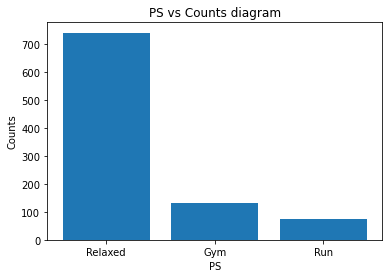

In [9]:
conteggio_categorie = df['PS'].value_counts()

# Creazione del grafico a barre
plt.bar(conteggio_categorie.index, conteggio_categorie.values)

# Aggiunta di titoli e etichette agli assi
plt.title('PS vs Counts diagram')
plt.xlabel('PS')
plt.ylabel('Counts')

# Mostra il grafico
plt.show()

C:\Users\Giuseppe\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 94.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Giuseppe\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 58.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Giuseppe\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


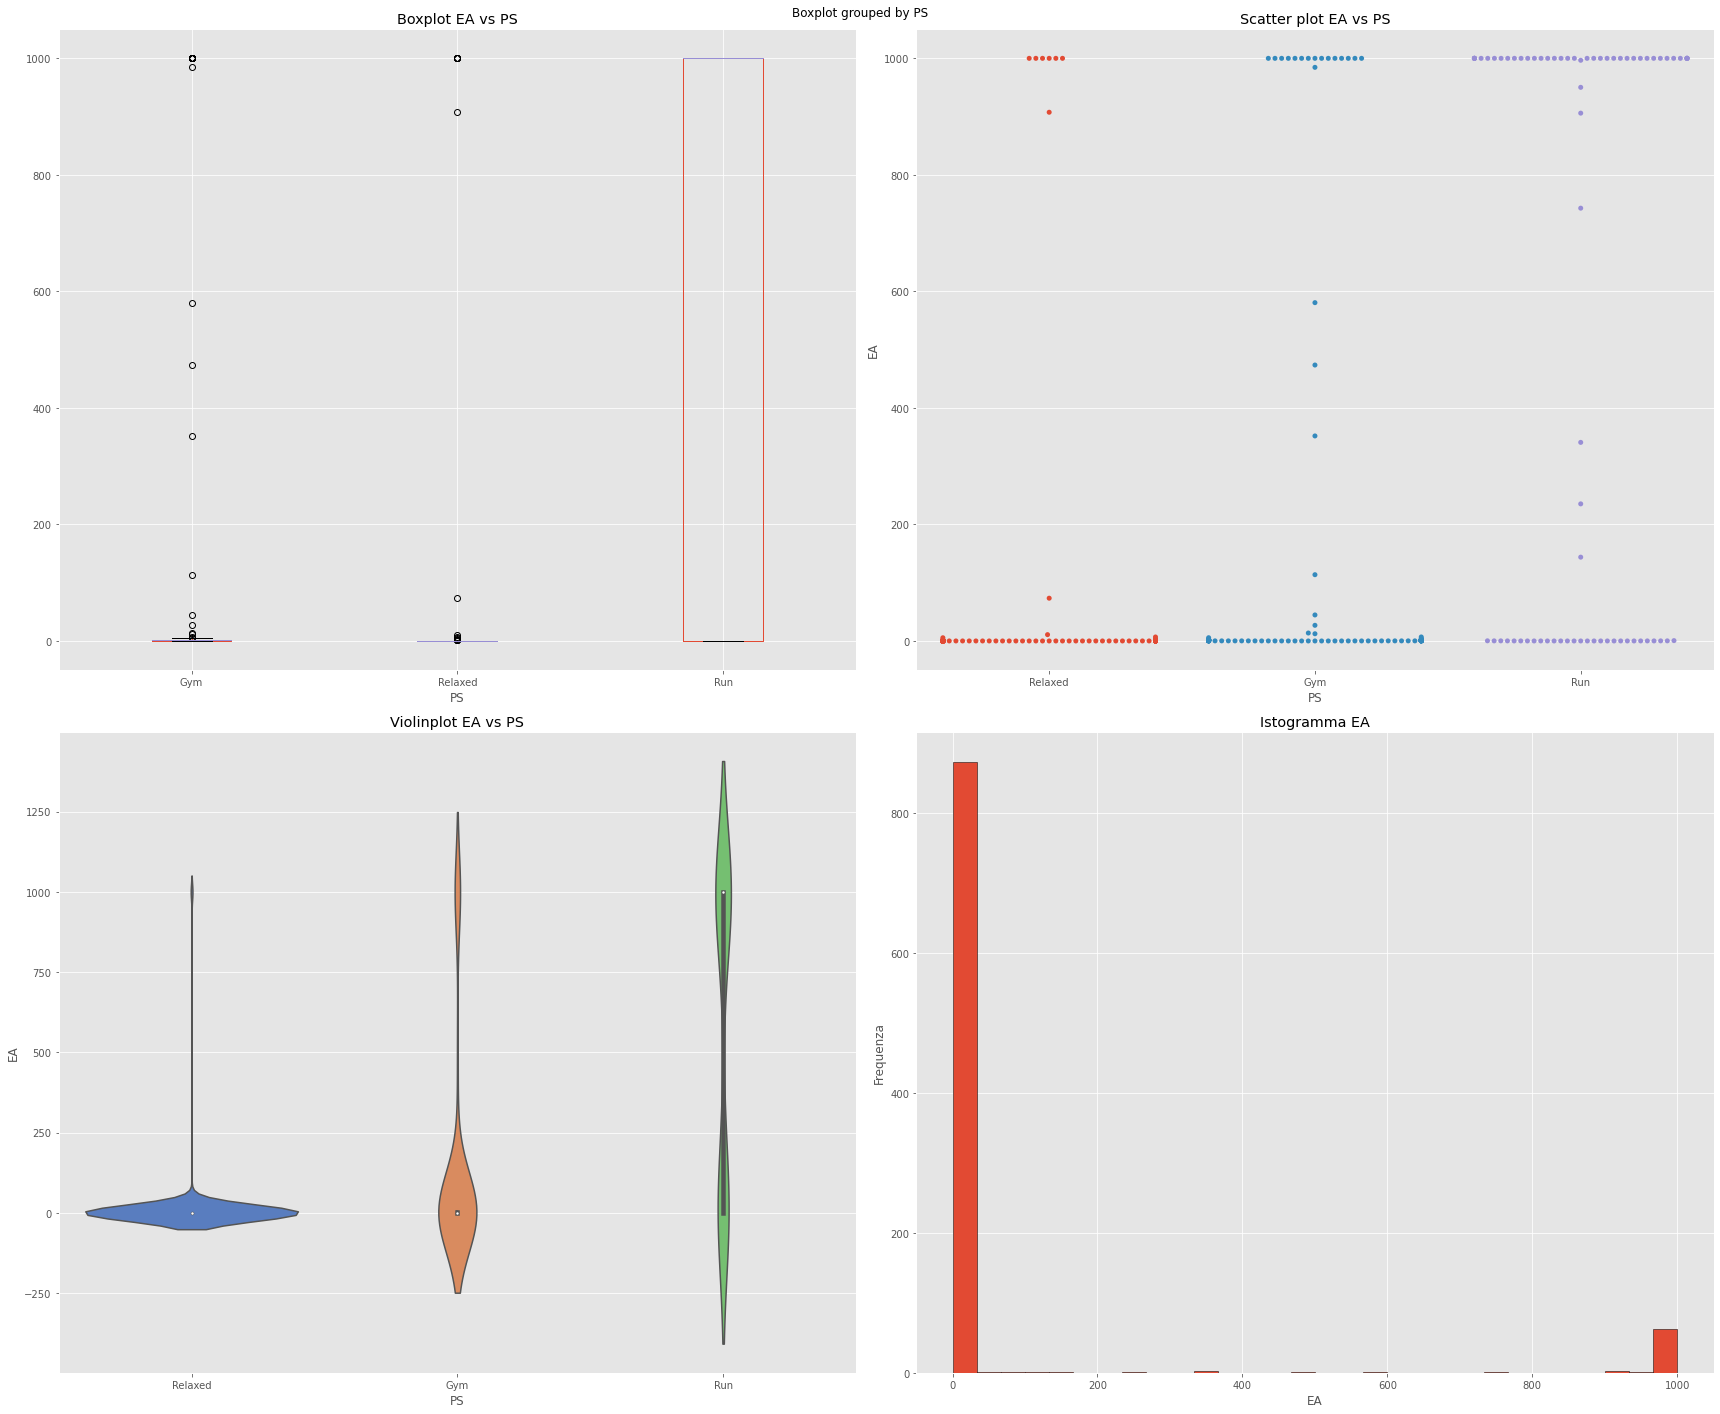

In [57]:
#analisi delle variabili individualmente
#Analisi della EA
# Crea i subplot
fig, ax = plt.subplots(2, 2, figsize=(24, 20))

# Boxplot
df.boxplot(column='EA', by='PS', ax=ax[0, 0])
ax[0, 0].set_title('Boxplot EA vs PS')

# Swarmplot
sns.swarmplot(x='PS', y='EA', data=df, ax=ax[0, 1])
ax[0, 1].set_title('Scatter plot EA vs PS')

# Violinplot
sns.violinplot(x='PS', y='EA', data=df, palette='muted', ax=ax[1, 0])
ax[1, 0].set_title('Violinplot EA vs PS')

# Istogramma
ax[1, 1].hist(df["EA"], bins=30, edgecolor='black')
ax[1, 1].set_title('Istogramma EA')
ax[1, 1].set_xlabel('EA')
ax[1, 1].set_ylabel('Frequenza')

# Aggiusta gli spazi tra i subplot
plt.tight_layout()

# Mostra la figura
plt.show()

C:\Users\Giuseppe\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 41.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


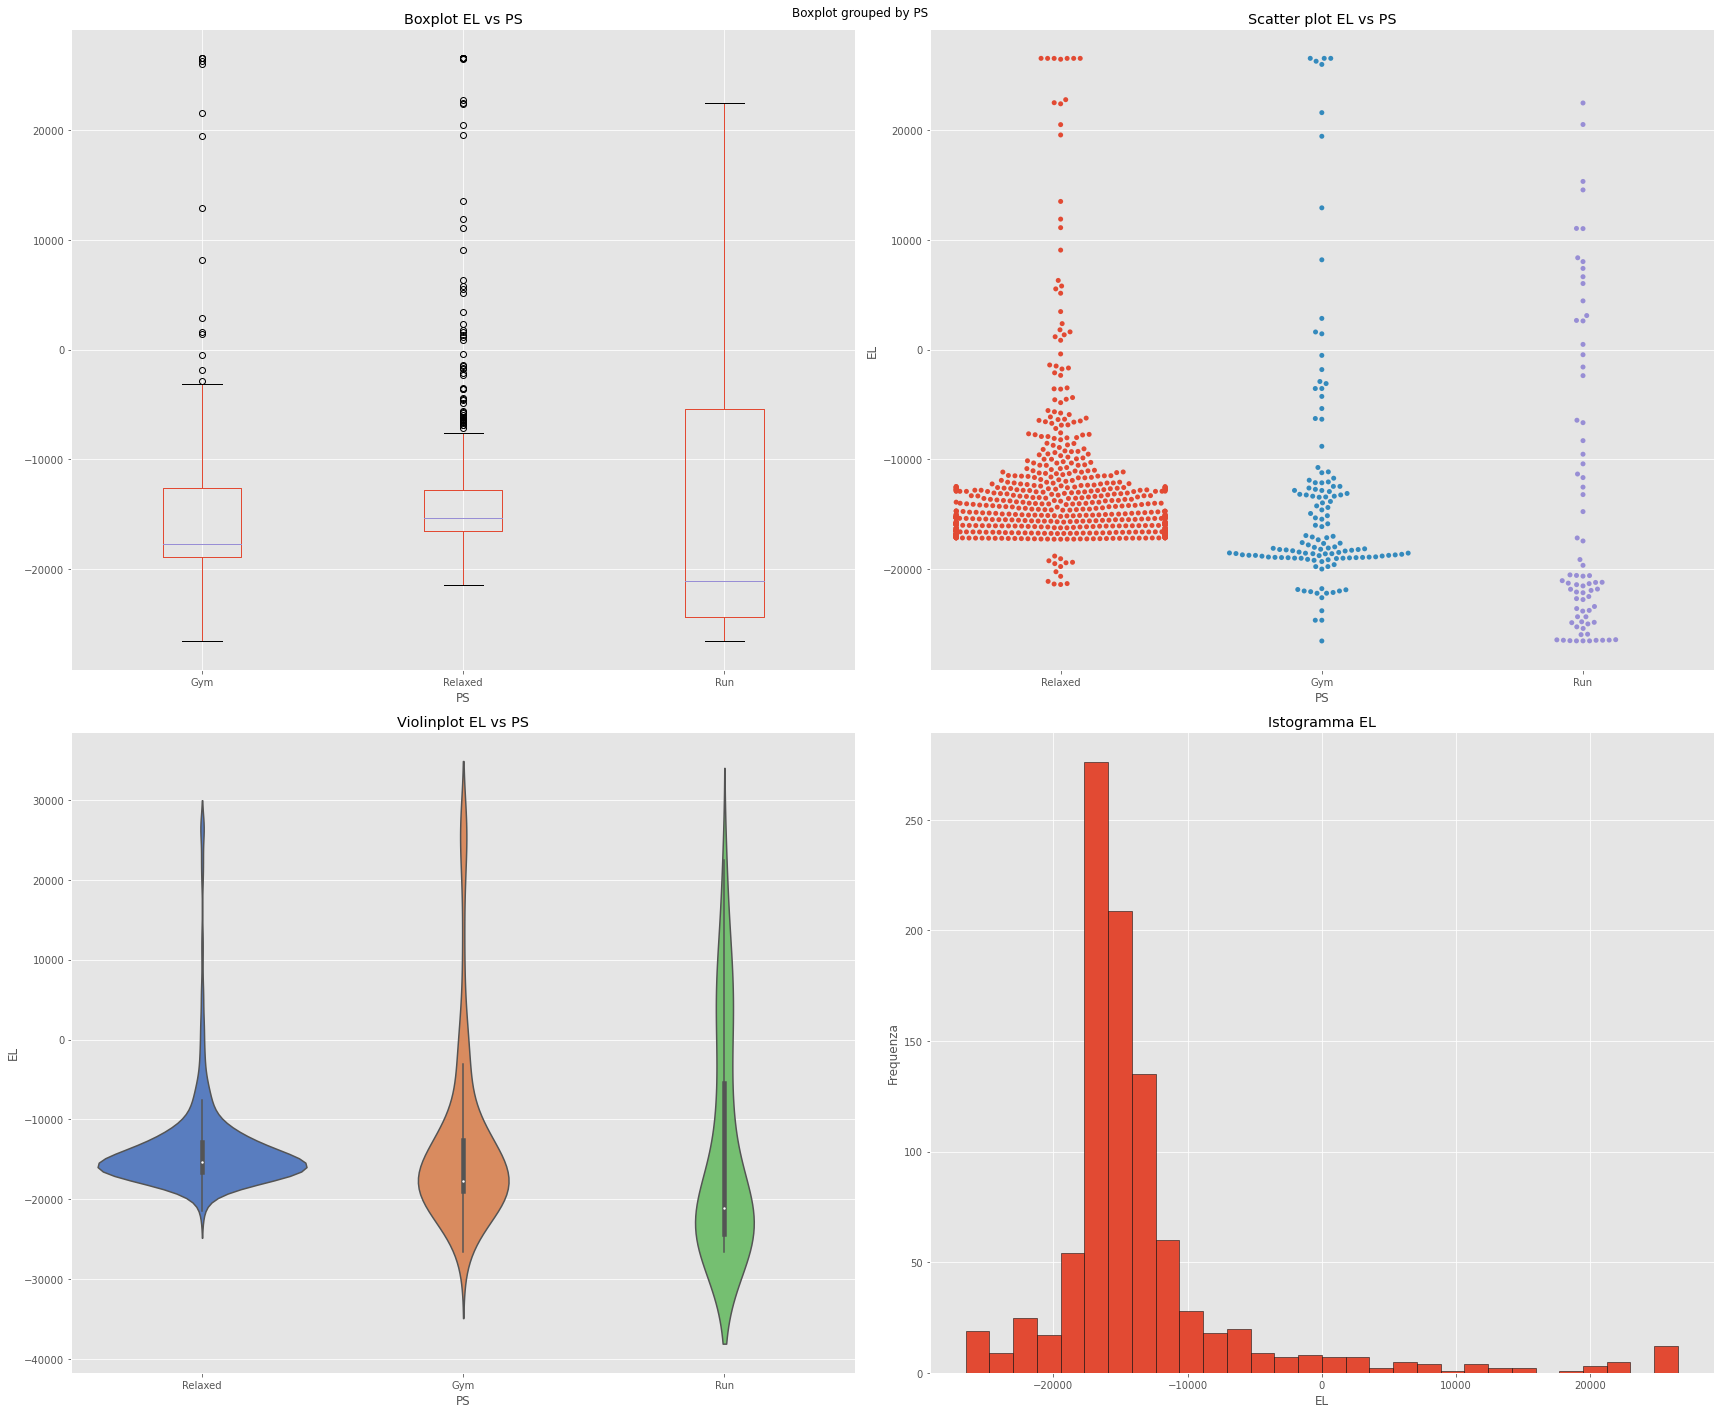

In [58]:
#analisi delle variabili individualmente
#Analisi della EL
# Crea i subplot
fig, ax = plt.subplots(2, 2, figsize=(24, 20))

# Boxplot
df.boxplot(column='EL', by='PS', ax=ax[0, 0])
ax[0, 0].set_title('Boxplot EL vs PS')

# Swarmplot
sns.swarmplot(x='PS', y='EL', data=df, ax=ax[0, 1])
ax[0, 1].set_title('Scatter plot EL vs PS')

# Violinplot
sns.violinplot(x='PS', y='EL', data=df, palette='muted', ax=ax[1, 0])
ax[1, 0].set_title('Violinplot EL vs PS')

# Istogramma
ax[1, 1].hist(df["EL"], bins=30, edgecolor='black')
ax[1, 1].set_title('Istogramma EL')
ax[1, 1].set_xlabel('EL')
ax[1, 1].set_ylabel('Frequenza')

# Aggiusta gli spazi tra i subplot
plt.tight_layout()

# Mostra la figura
plt.show()

C:\Users\Giuseppe\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


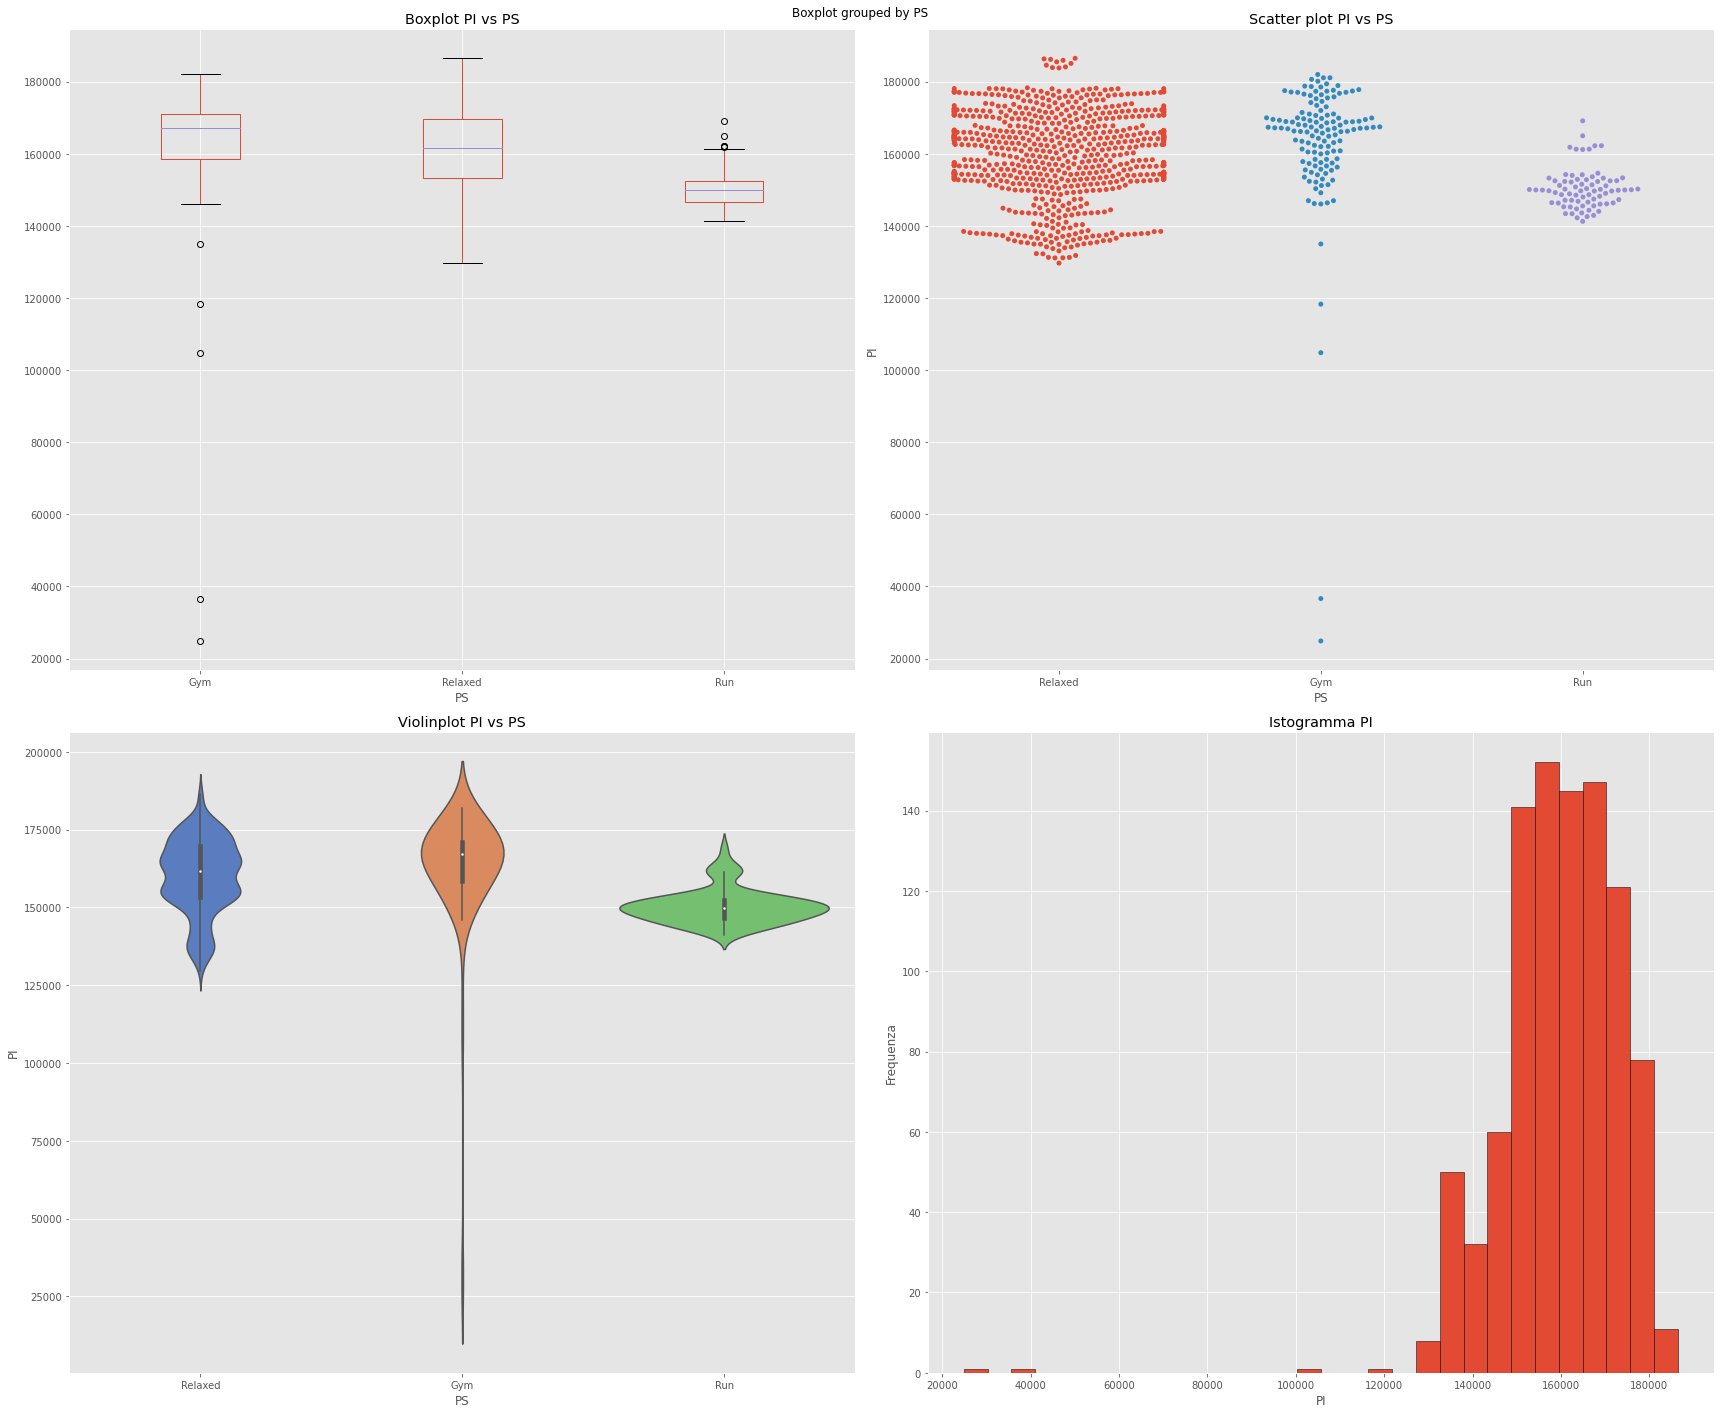

In [59]:
#analisi delle variabili individualmente
#Analisi della PI
# Crea i subplot
fig, ax = plt.subplots(2, 2, figsize=(24, 20))

# Boxplot
df.boxplot(column='PI', by='PS', ax=ax[0, 0])
ax[0, 0].set_title('Boxplot PI vs PS')

# Swarmplot
sns.swarmplot(x='PS', y='PI', data=df, ax=ax[0, 1])
ax[0, 1].set_title('Scatter plot PI vs PS')

# Violinplot
sns.violinplot(x='PS', y='PI', data=df, palette='muted', ax=ax[1, 0])
ax[1, 0].set_title('Violinplot PI vs PS')

# Istogramma
ax[1, 1].hist(df["PI"], bins=30, edgecolor='black')
ax[1, 1].set_title('Istogramma PI')
ax[1, 1].set_xlabel('PI')
ax[1, 1].set_ylabel('Frequenza')

# Aggiusta gli spazi tra i subplot
plt.tight_layout()

# Mostra la figura
plt.show()

C:\Users\Giuseppe\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 31.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


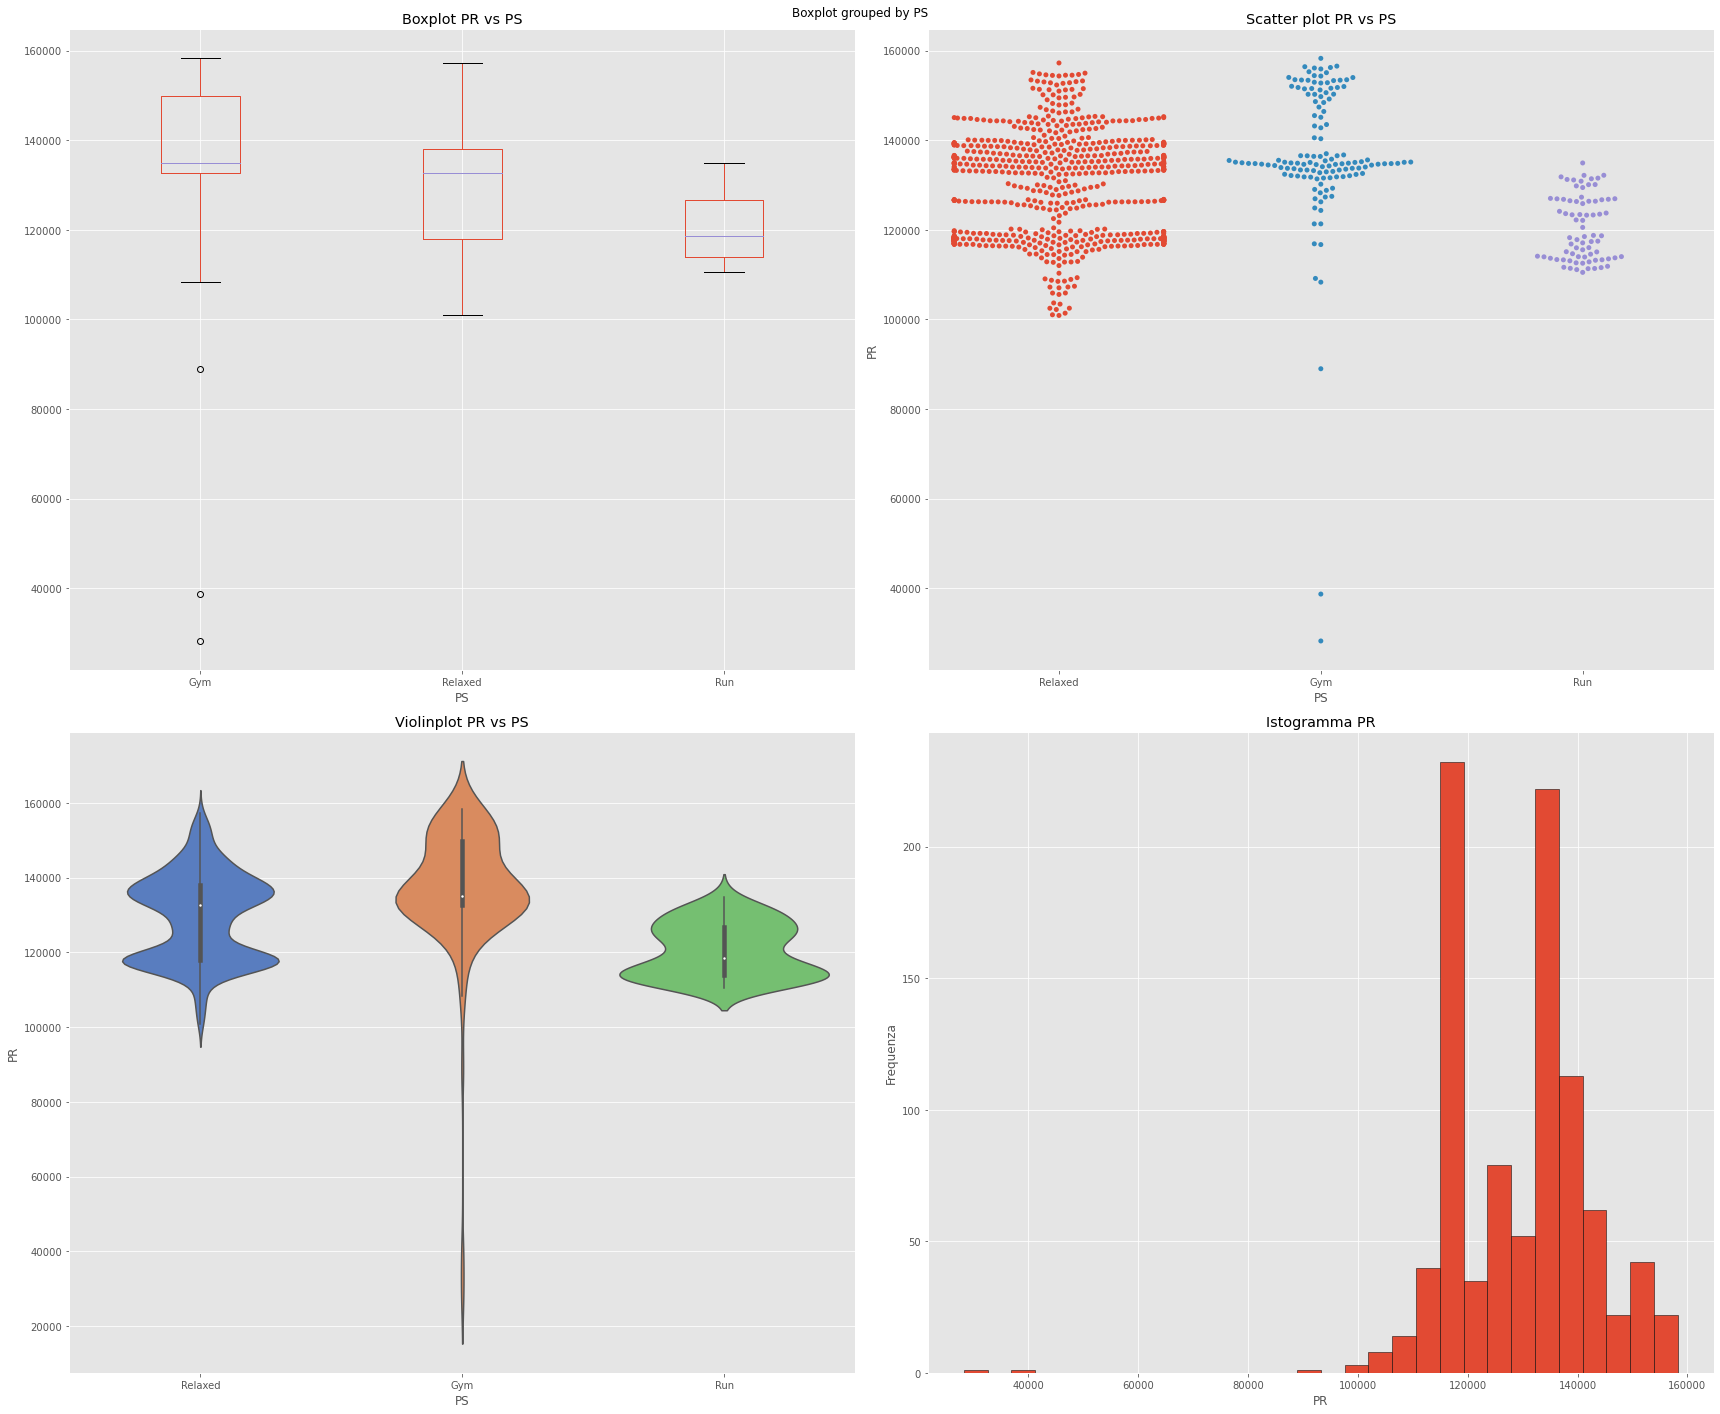

In [60]:
#analisi delle variabili individualmente
#Analisi della PR
# Crea i subplot
fig, ax = plt.subplots(2, 2, figsize=(24, 20))

# Boxplot
df.boxplot(column='PR', by='PS', ax=ax[0, 0])
ax[0, 0].set_title('Boxplot PR vs PS')

# Swarmplot
sns.swarmplot(x='PS', y='PR', data=df, ax=ax[0, 1])
ax[0, 1].set_title('Scatter plot PR vs PS')

# Violinplot
sns.violinplot(x='PS', y='PR', data=df, palette='muted', ax=ax[1, 0])
ax[1, 0].set_title('Violinplot PR vs PS')

# Istogramma
ax[1, 1].hist(df["PR"], bins=30, edgecolor='black')
ax[1, 1].set_title('Istogramma PR')
ax[1, 1].set_xlabel('PR')
ax[1, 1].set_ylabel('Frequenza')

# Aggiusta gli spazi tra i subplot
plt.tight_layout()

# Mostra la figura
plt.show()

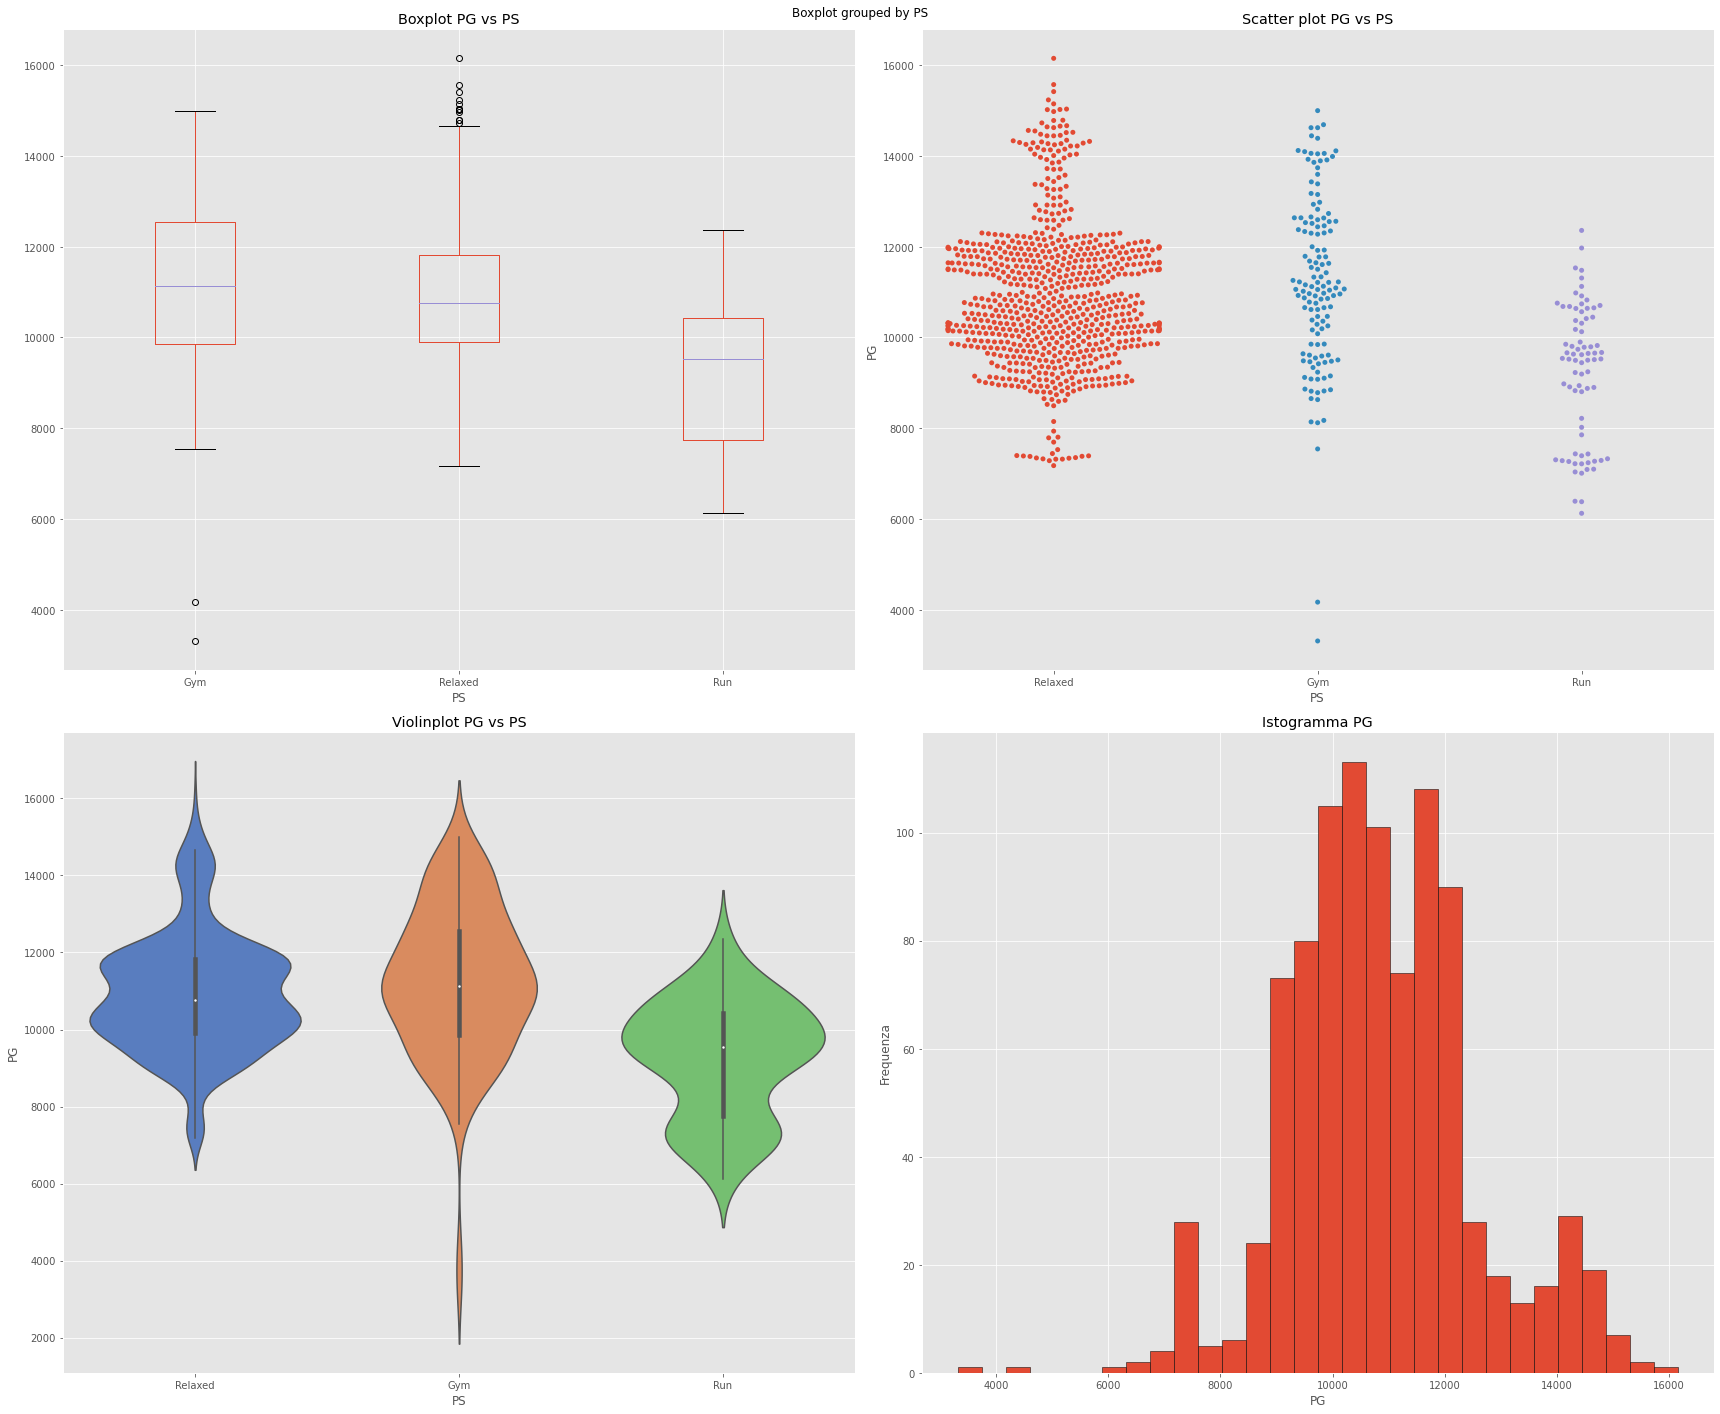

In [61]:
#analisi delle variabili individualmente
#Analisi della PG
# Crea i subplot
fig, ax = plt.subplots(2, 2, figsize=(24, 20))

# Boxplot
df.boxplot(column='PG', by='PS', ax=ax[0, 0])
ax[0, 0].set_title('Boxplot PG vs PS')

# Swarmplot
sns.swarmplot(x='PS', y='PG', data=df, ax=ax[0, 1])
ax[0, 1].set_title('Scatter plot PG vs PS')

# Violinplot
sns.violinplot(x='PS', y='PG', data=df, palette='muted', ax=ax[1, 0])
ax[1, 0].set_title('Violinplot PG vs PS')

# Istogramma
ax[1, 1].hist(df["PG"], bins=30, edgecolor='black')
ax[1, 1].set_title('Istogramma PG')
ax[1, 1].set_xlabel('PG')
ax[1, 1].set_ylabel('Frequenza')

# Aggiusta gli spazi tra i subplot
plt.tight_layout()

# Mostra la figura
plt.show()

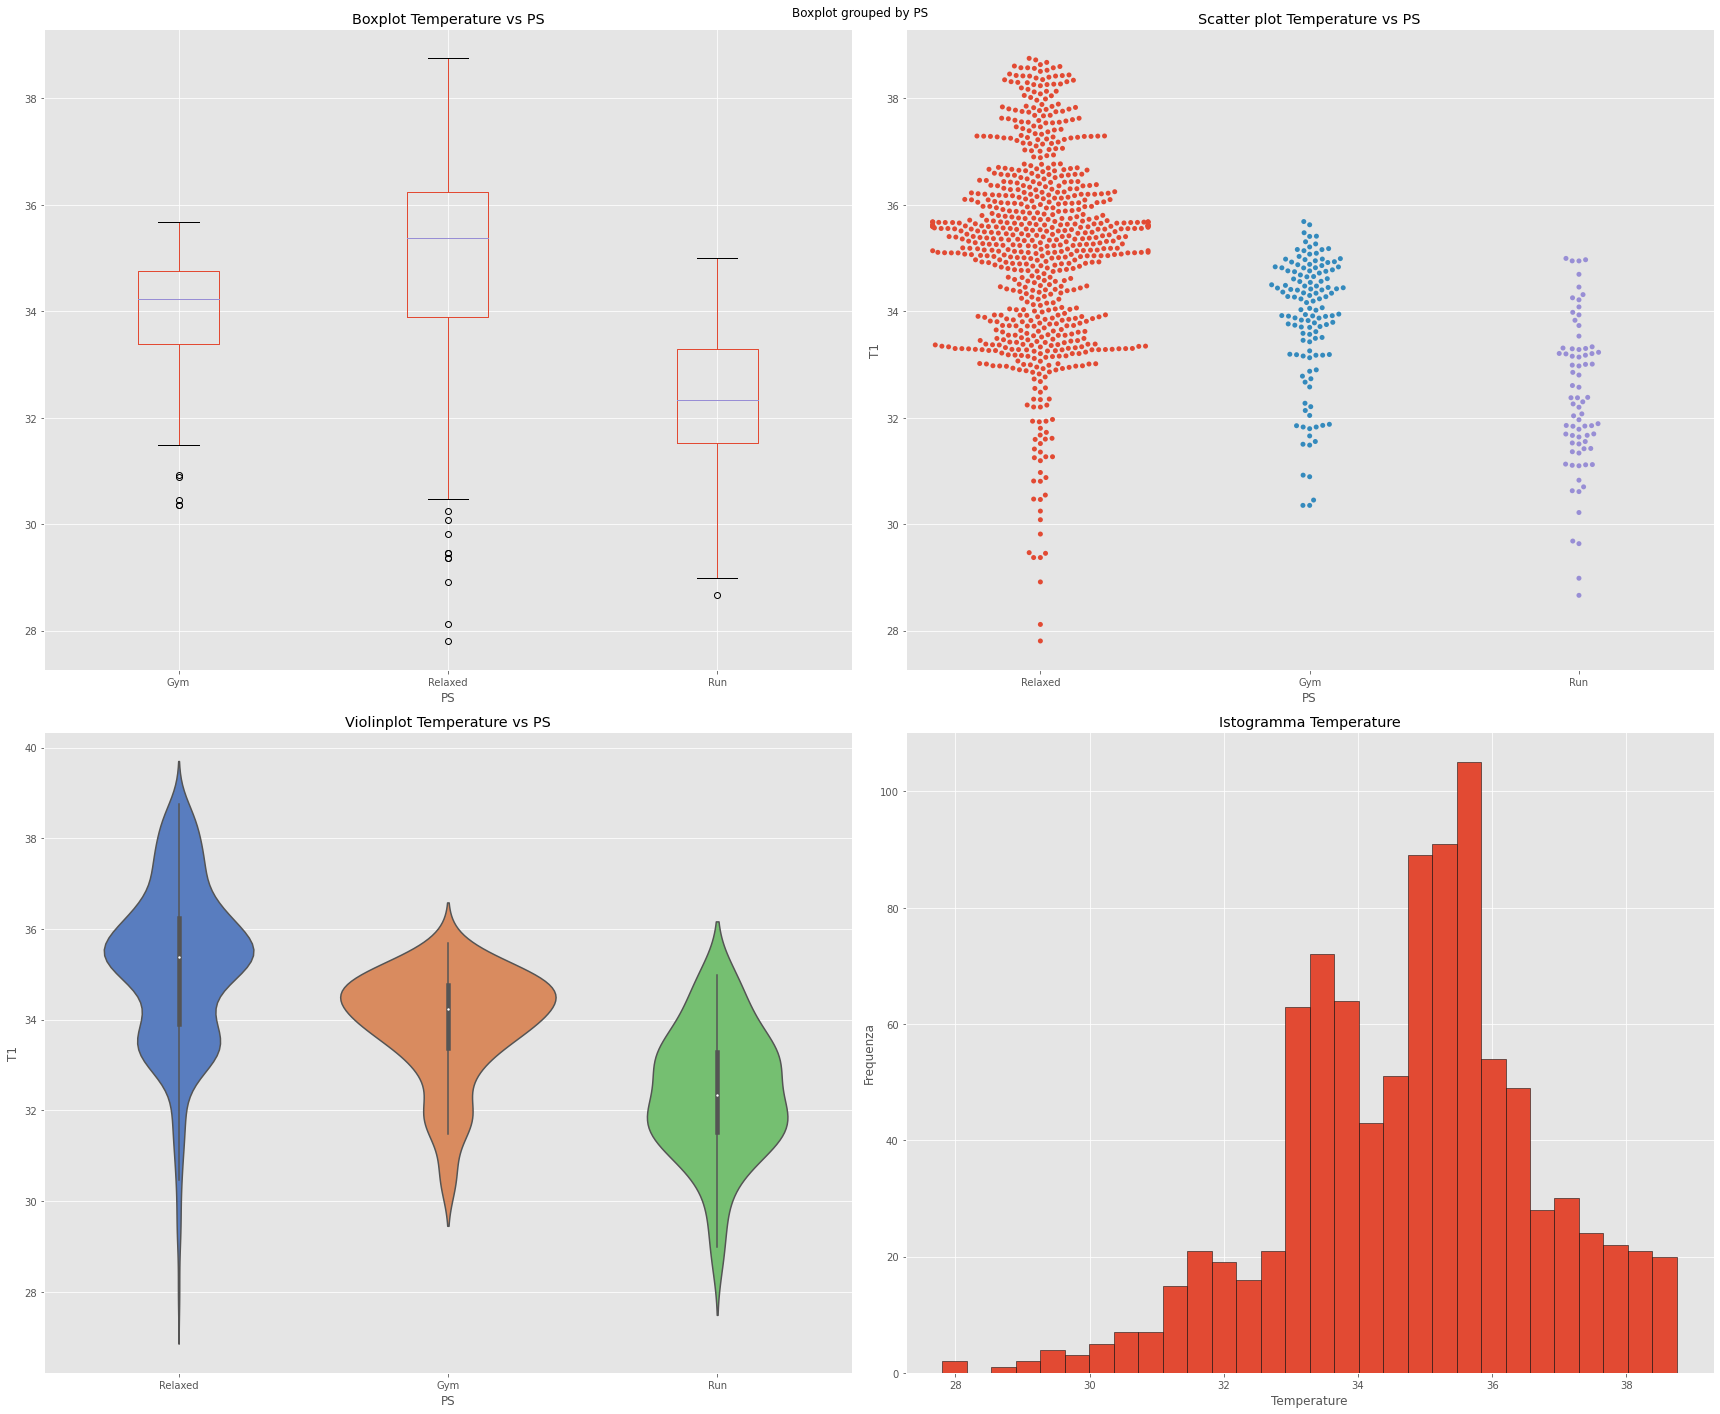

In [63]:
#analisi delle variabili individualmente
#Analisi della T1
# Crea i subplot
fig, ax = plt.subplots(2, 2, figsize=(24, 20))

# Boxplot
df.boxplot(column='T1', by='PS', ax=ax[0, 0])
ax[0, 0].set_title('Boxplot Temperature vs PS')

# Swarmplot
sns.swarmplot(x='PS', y='T1', data=df, ax=ax[0, 1])
ax[0, 1].set_title('Scatter plot Temperature vs PS')

# Violinplot
sns.violinplot(x='PS', y='T1', data=df, palette='muted', ax=ax[1, 0])
ax[1, 0].set_title('Violinplot Temperature vs PS')

# Istogramma
ax[1, 1].hist(df["T1"], bins=30, edgecolor='black')
ax[1, 1].set_title('Istogramma Temperature')
ax[1, 1].set_xlabel('Temperature')
ax[1, 1].set_ylabel('Frequenza')

# Aggiusta gli spazi tra i subplot
plt.tight_layout()

# Mostra la figura
plt.show()

C:\Users\Giuseppe\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


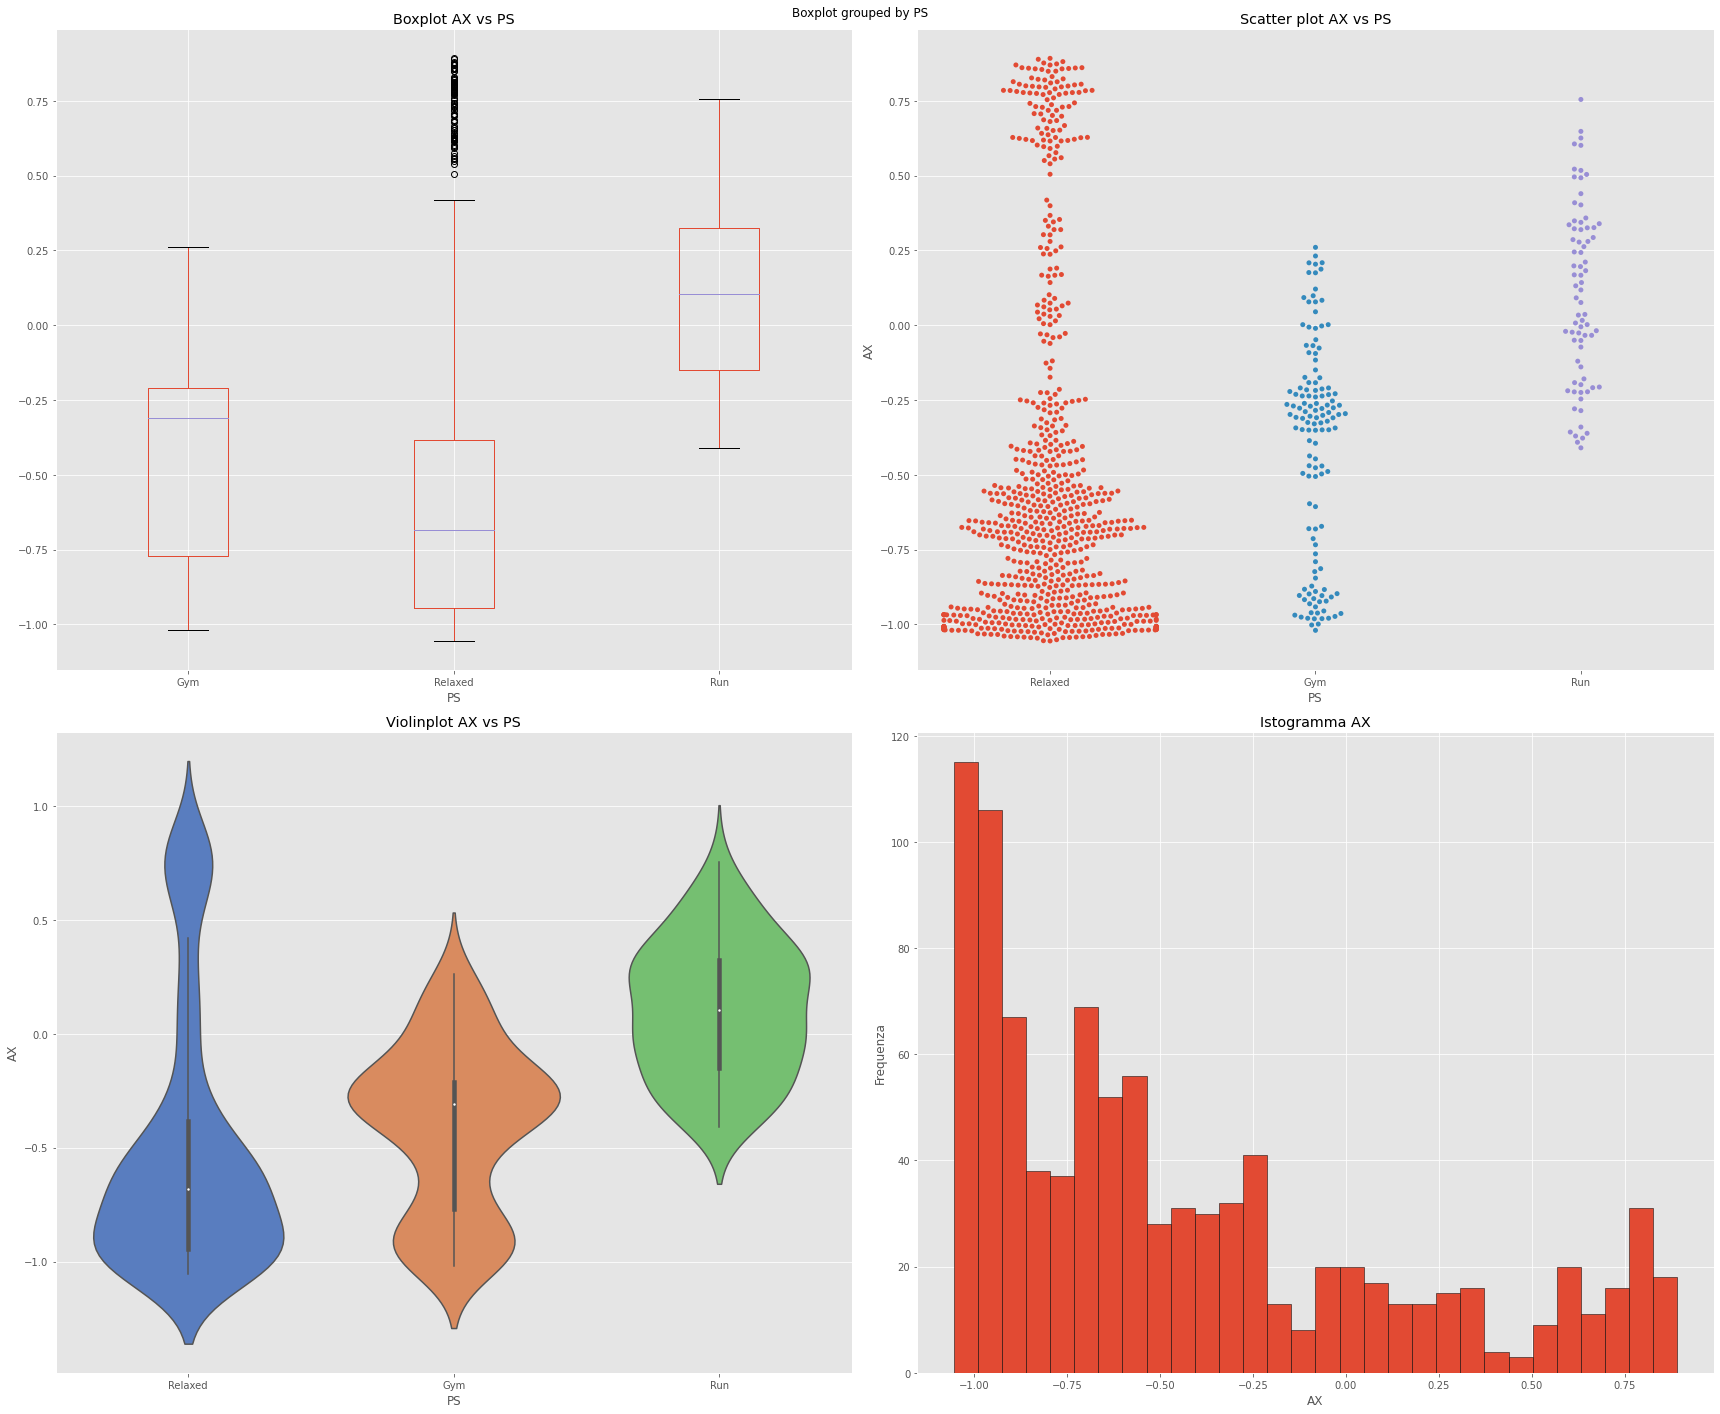

In [64]:
#analisi delle variabili individualmente
#Analisi della AX
# Crea i subplot
fig, ax = plt.subplots(2, 2, figsize=(24, 20))

# Boxplot
df.boxplot(column='AX', by='PS', ax=ax[0, 0])
ax[0, 0].set_title('Boxplot AX vs PS')

# Swarmplot
sns.swarmplot(x='PS', y='AX', data=df, ax=ax[0, 1])
ax[0, 1].set_title('Scatter plot AX vs PS')

# Violinplot
sns.violinplot(x='PS', y='AX', data=df, palette='muted', ax=ax[1, 0])
ax[1, 0].set_title('Violinplot AX vs PS')

# Istogramma
ax[1, 1].hist(df["AX"], bins=30, edgecolor='black')
ax[1, 1].set_title('Istogramma AX')
ax[1, 1].set_xlabel('AX')
ax[1, 1].set_ylabel('Frequenza')

# Aggiusta gli spazi tra i subplot
plt.tight_layout()

# Mostra la figura
plt.show()

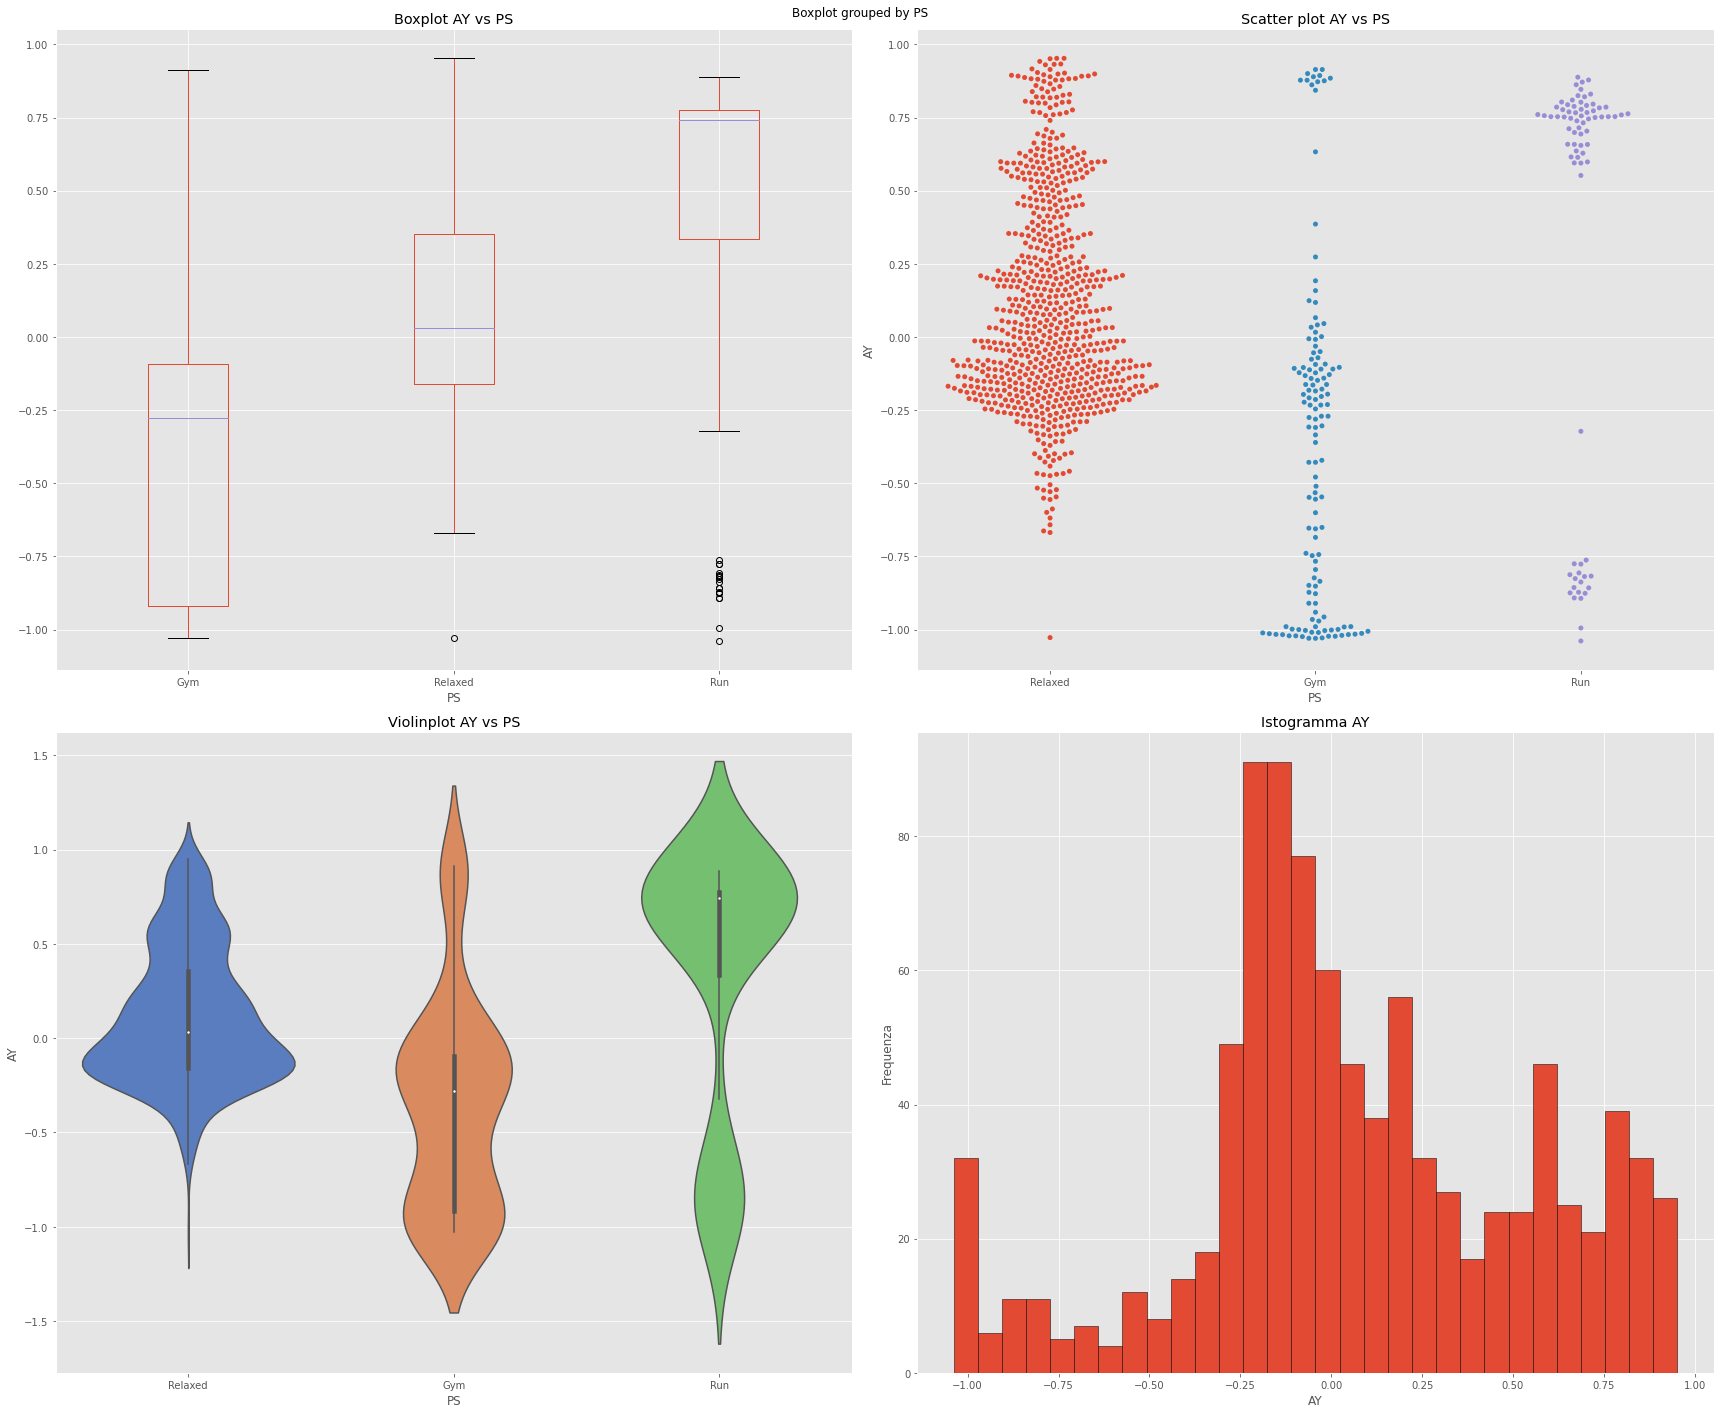

In [65]:
#analisi delle variabili individualmente
#Analisi della AY
# Crea i subplot
fig, ax = plt.subplots(2, 2, figsize=(24, 20))

# Boxplot
df.boxplot(column='AY', by='PS', ax=ax[0, 0])
ax[0, 0].set_title('Boxplot AY vs PS')

# Swarmplot
sns.swarmplot(x='PS', y='AY', data=df, ax=ax[0, 1])
ax[0, 1].set_title('Scatter plot AY vs PS')

# Violinplot
sns.violinplot(x='PS', y='AY', data=df, palette='muted', ax=ax[1, 0])
ax[1, 0].set_title('Violinplot AY vs PS')

# Istogramma
ax[1, 1].hist(df["AY"], bins=30, edgecolor='black')
ax[1, 1].set_title('Istogramma AY')
ax[1, 1].set_xlabel('AY')
ax[1, 1].set_ylabel('Frequenza')

# Aggiusta gli spazi tra i subplot
plt.tight_layout()

# Mostra la figura
plt.show()

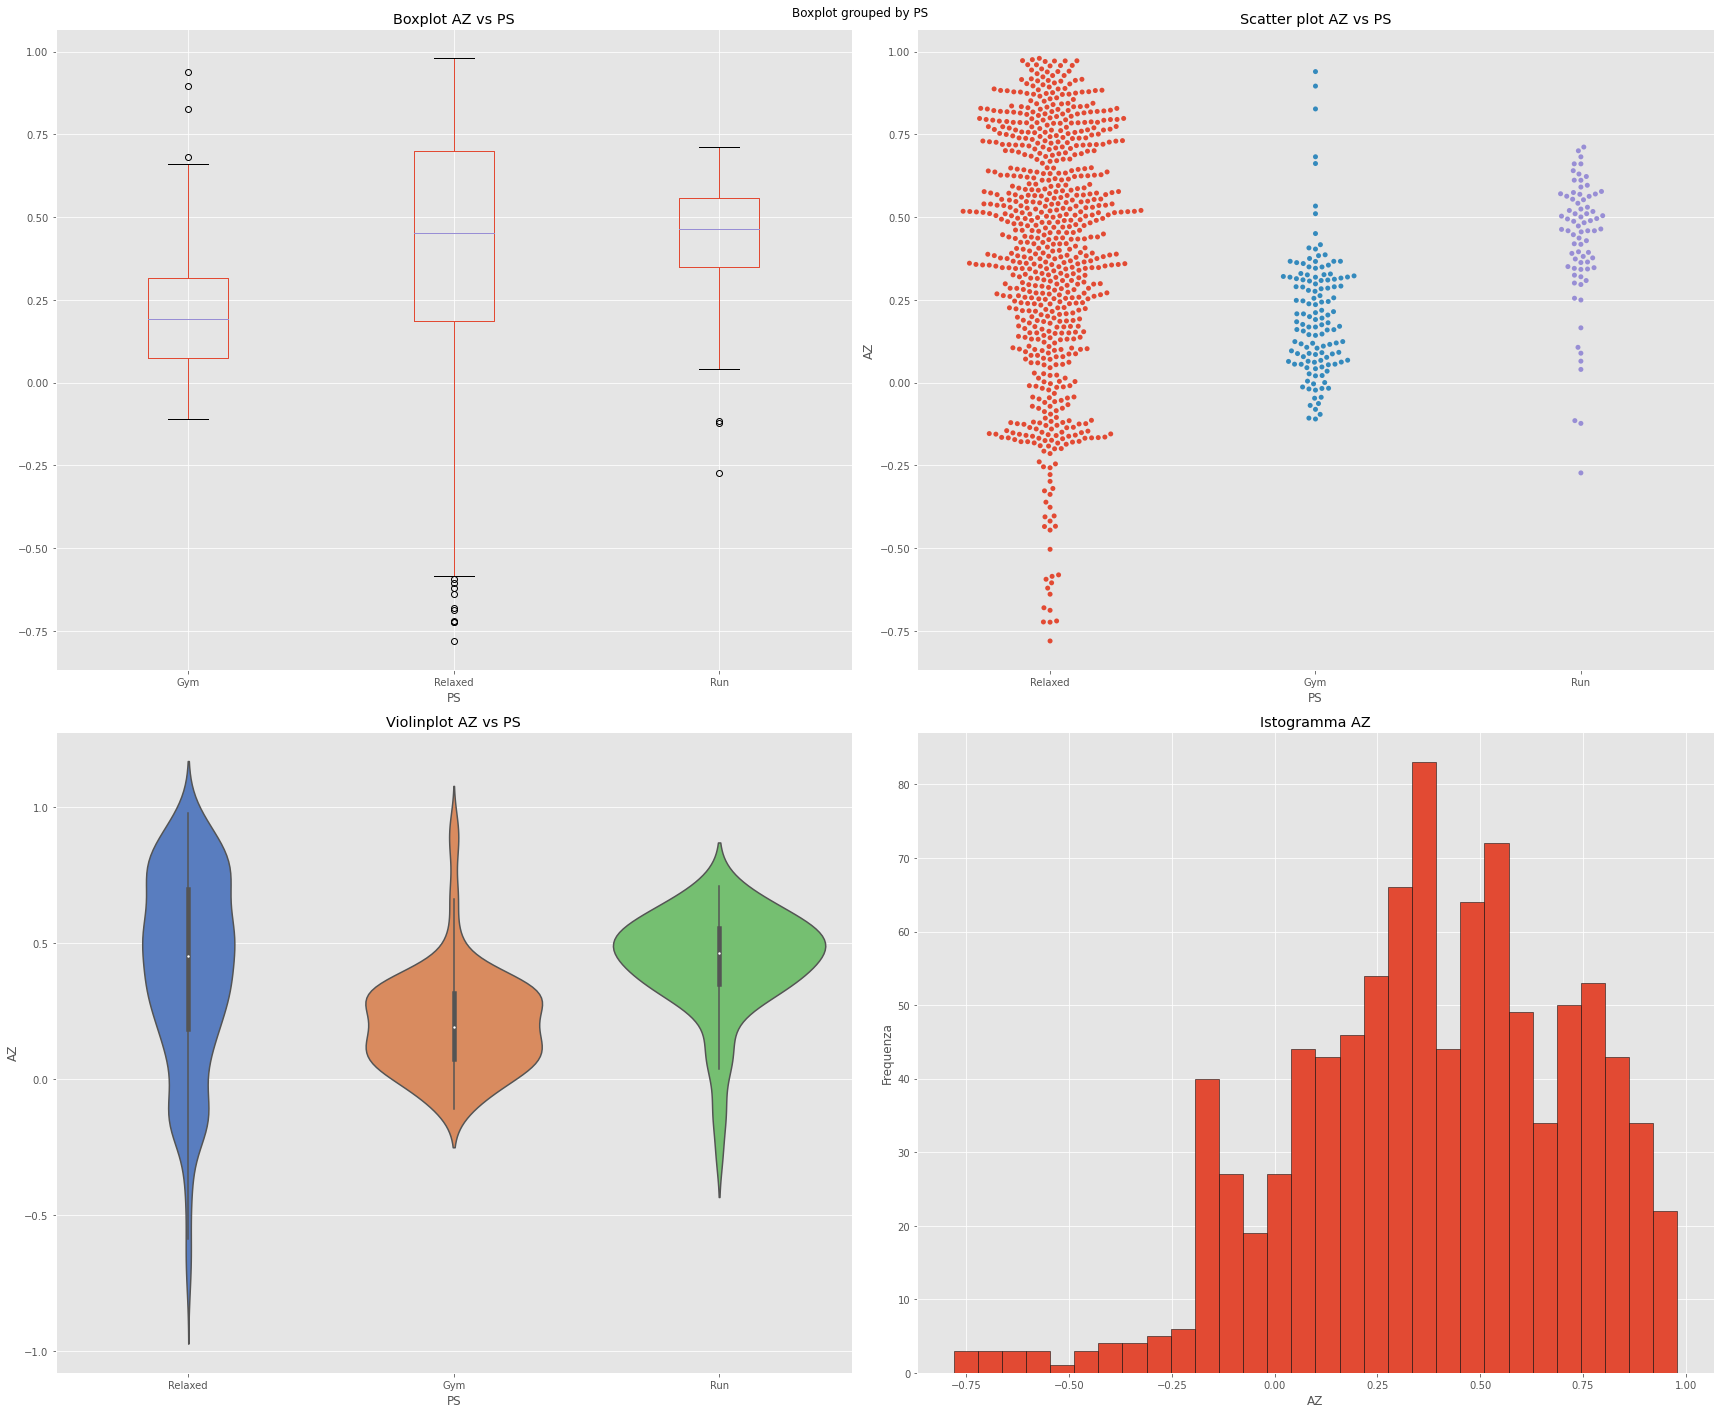

In [66]:
#analisi delle variabili individualmente
#Analisi della AZ
# Crea i subplot
fig, ax = plt.subplots(2, 2, figsize=(24, 20))

# Boxplot
df.boxplot(column='AZ', by='PS', ax=ax[0, 0])
ax[0, 0].set_title('Boxplot AZ vs PS')

# Swarmplot
sns.swarmplot(x='PS', y='AZ', data=df, ax=ax[0, 1])
ax[0, 1].set_title('Scatter plot AZ vs PS')

# Violinplot
sns.violinplot(x='PS', y='AZ', data=df, palette='muted', ax=ax[1, 0])
ax[1, 0].set_title('Violinplot AZ vs PS')

# Istogramma
ax[1, 1].hist(df["AZ"], bins=30, edgecolor='black')
ax[1, 1].set_title('Istogramma AZ')
ax[1, 1].set_xlabel('AZ')
ax[1, 1].set_ylabel('Frequenza')

# Aggiusta gli spazi tra i subplot
plt.tight_layout()

# Mostra la figura
plt.show()

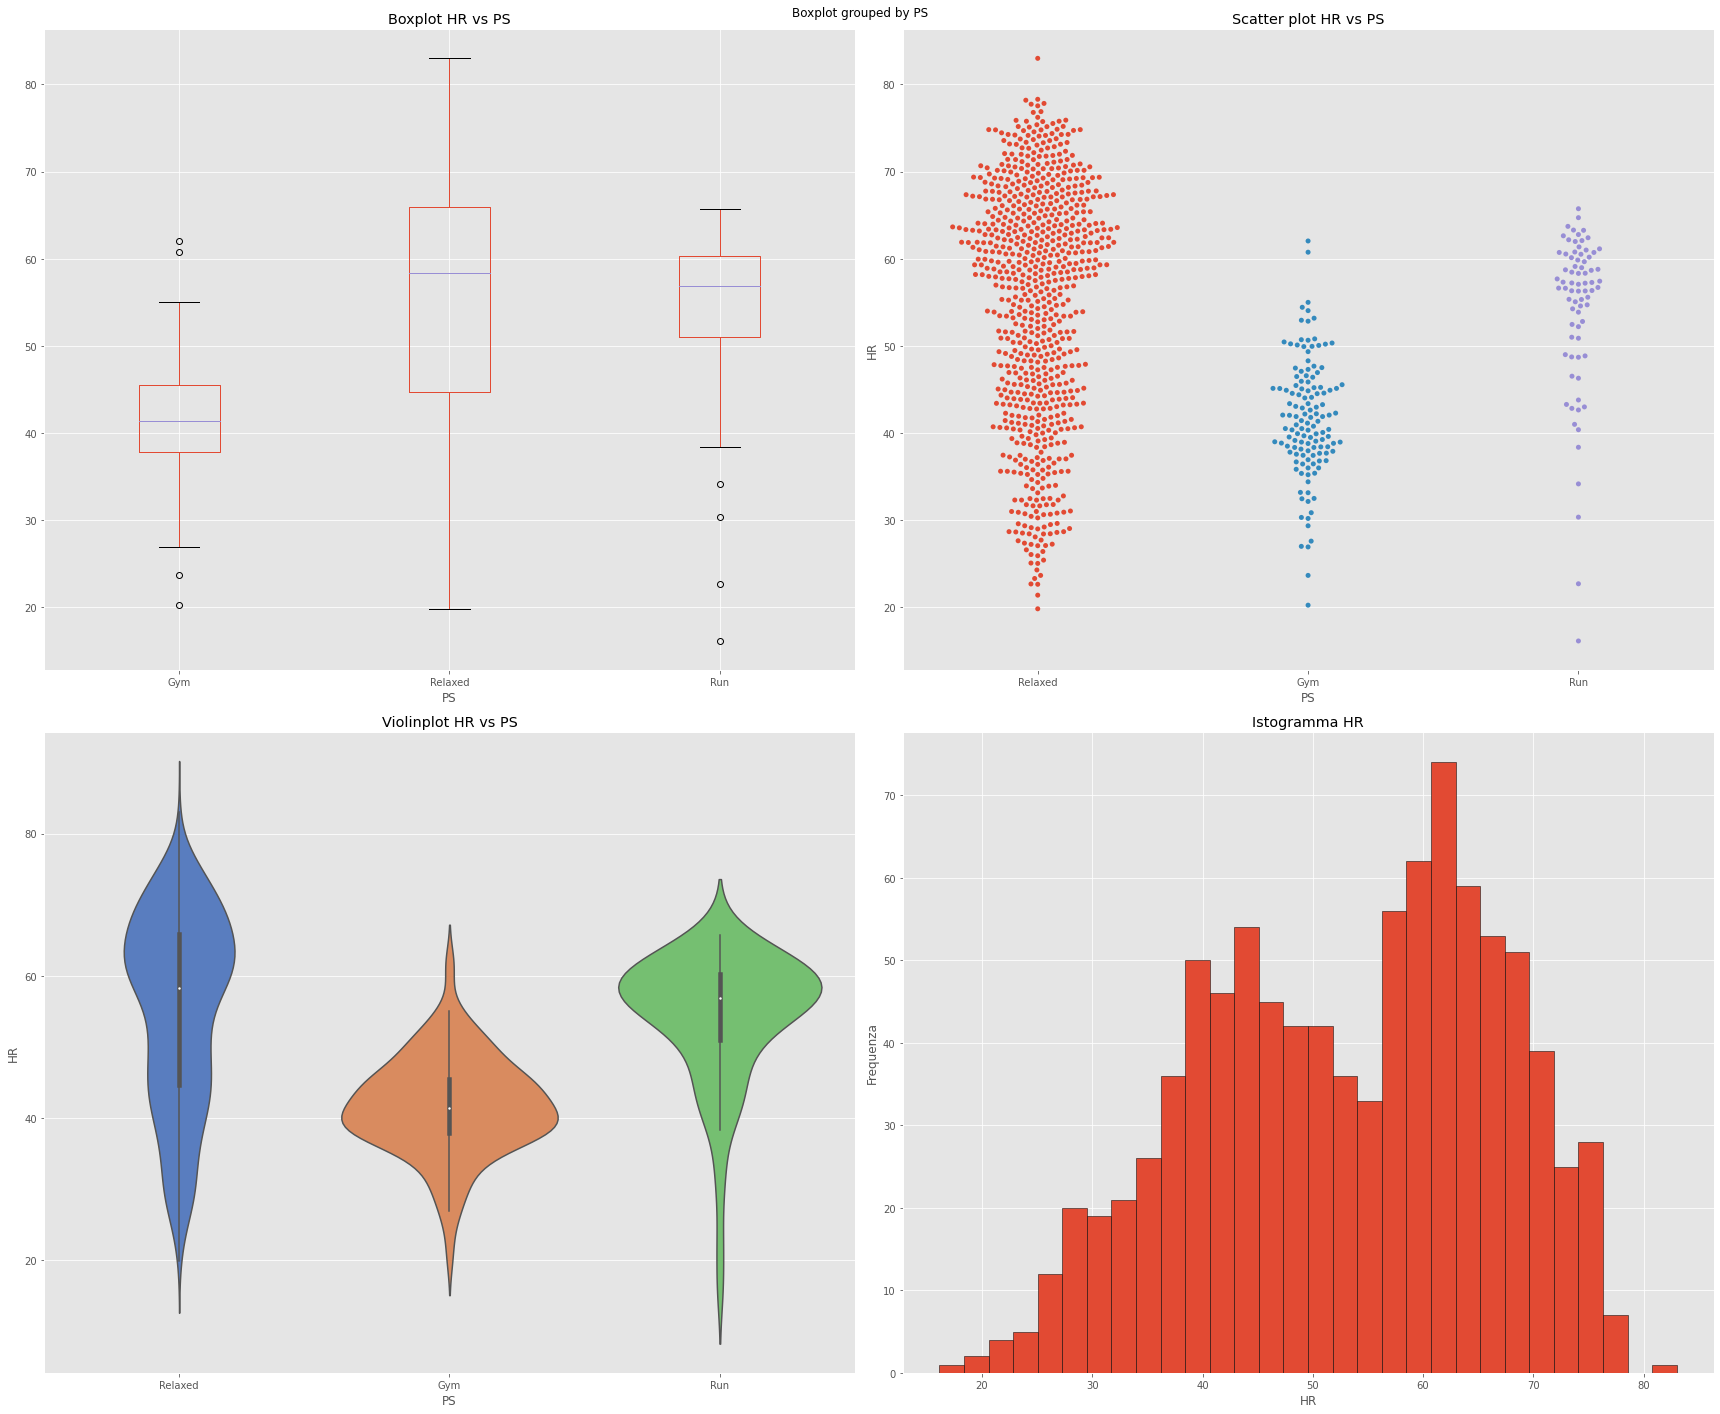

In [67]:
#analisi delle variabili individualmente
#Analisi della HR
# Crea i subplot
fig, ax = plt.subplots(2, 2, figsize=(24, 20))

# Boxplot
df.boxplot(column='HR', by='PS', ax=ax[0, 0])
ax[0, 0].set_title('Boxplot HR vs PS')

# Swarmplot
sns.swarmplot(x='PS', y='HR', data=df, ax=ax[0, 1])
ax[0, 1].set_title('Scatter plot HR vs PS')

# Violinplot
sns.violinplot(x='PS', y='HR', data=df, palette='muted', ax=ax[1, 0])
ax[1, 0].set_title('Violinplot HR vs PS')

# Istogramma
ax[1, 1].hist(df["HR"], bins=30, edgecolor='black')
ax[1, 1].set_title('Istogramma HR')
ax[1, 1].set_xlabel('HR')
ax[1, 1].set_ylabel('Frequenza')

# Aggiusta gli spazi tra i subplot
plt.tight_layout()

# Mostra la figura
plt.show()

C:\Users\Giuseppe\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 80.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Giuseppe\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 42.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Giuseppe\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 39.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


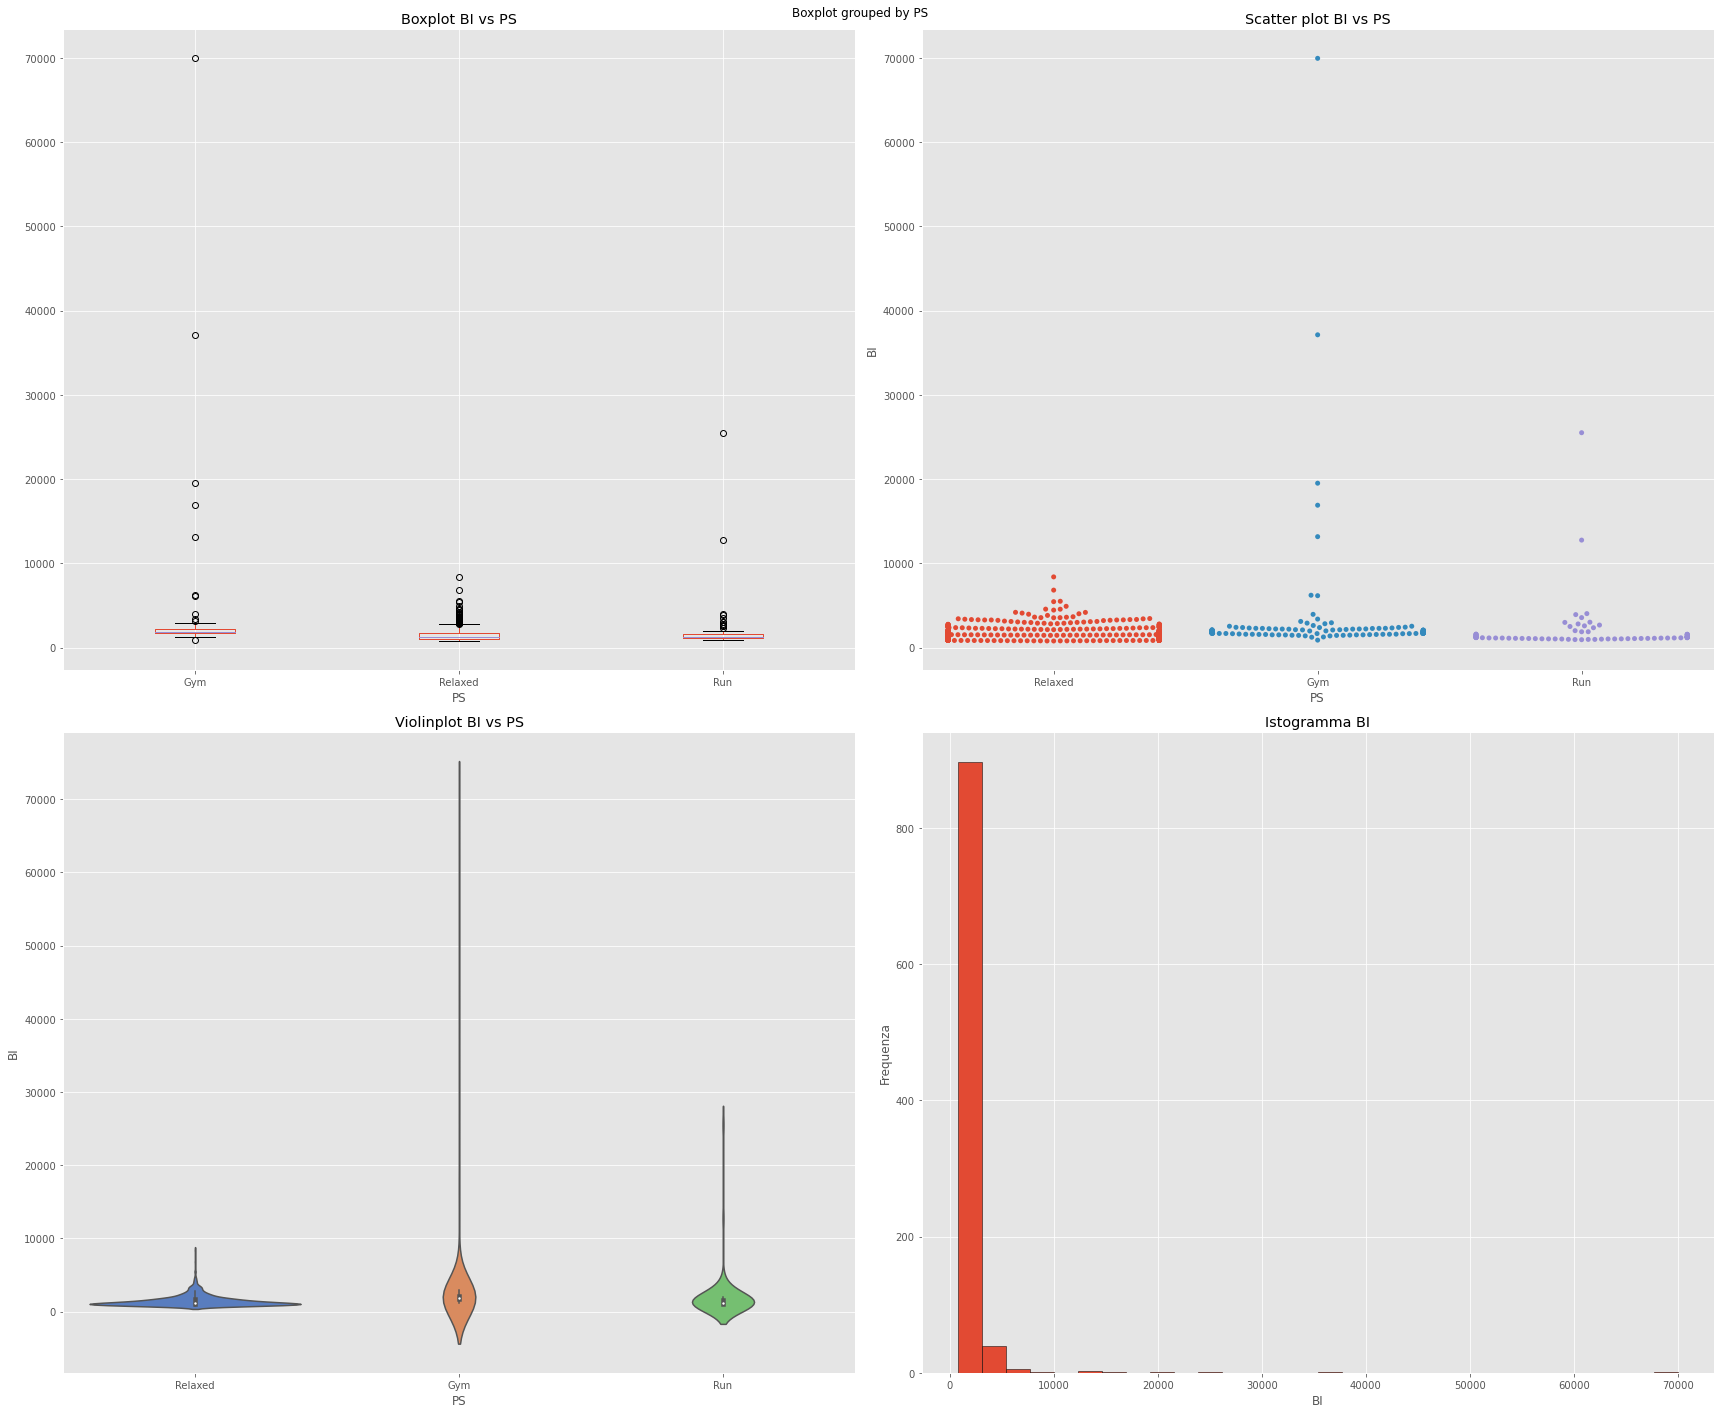

In [68]:
#analisi delle variabili individualmente
#Analisi della BI
# Crea i subplot
fig, ax = plt.subplots(2, 2, figsize=(24, 20))

# Boxplot
df.boxplot(column='BI', by='PS', ax=ax[0, 0])
ax[0, 0].set_title('Boxplot BI vs PS')

# Swarmplot
sns.swarmplot(x='PS', y='BI', data=df, ax=ax[0, 1])
ax[0, 1].set_title('Scatter plot BI vs PS')

# Violinplot
sns.violinplot(x='PS', y='BI', data=df, palette='muted', ax=ax[1, 0])
ax[1, 0].set_title('Violinplot BI vs PS')

# Istogramma
ax[1, 1].hist(df["BI"], bins=30, edgecolor='black')
ax[1, 1].set_title('Istogramma BI')
ax[1, 1].set_xlabel('BI')
ax[1, 1].set_ylabel('Frequenza')

# Aggiusta gli spazi tra i subplot
plt.tight_layout()

# Mostra la figura
plt.show()

C:\Users\Giuseppe\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 59.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Giuseppe\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


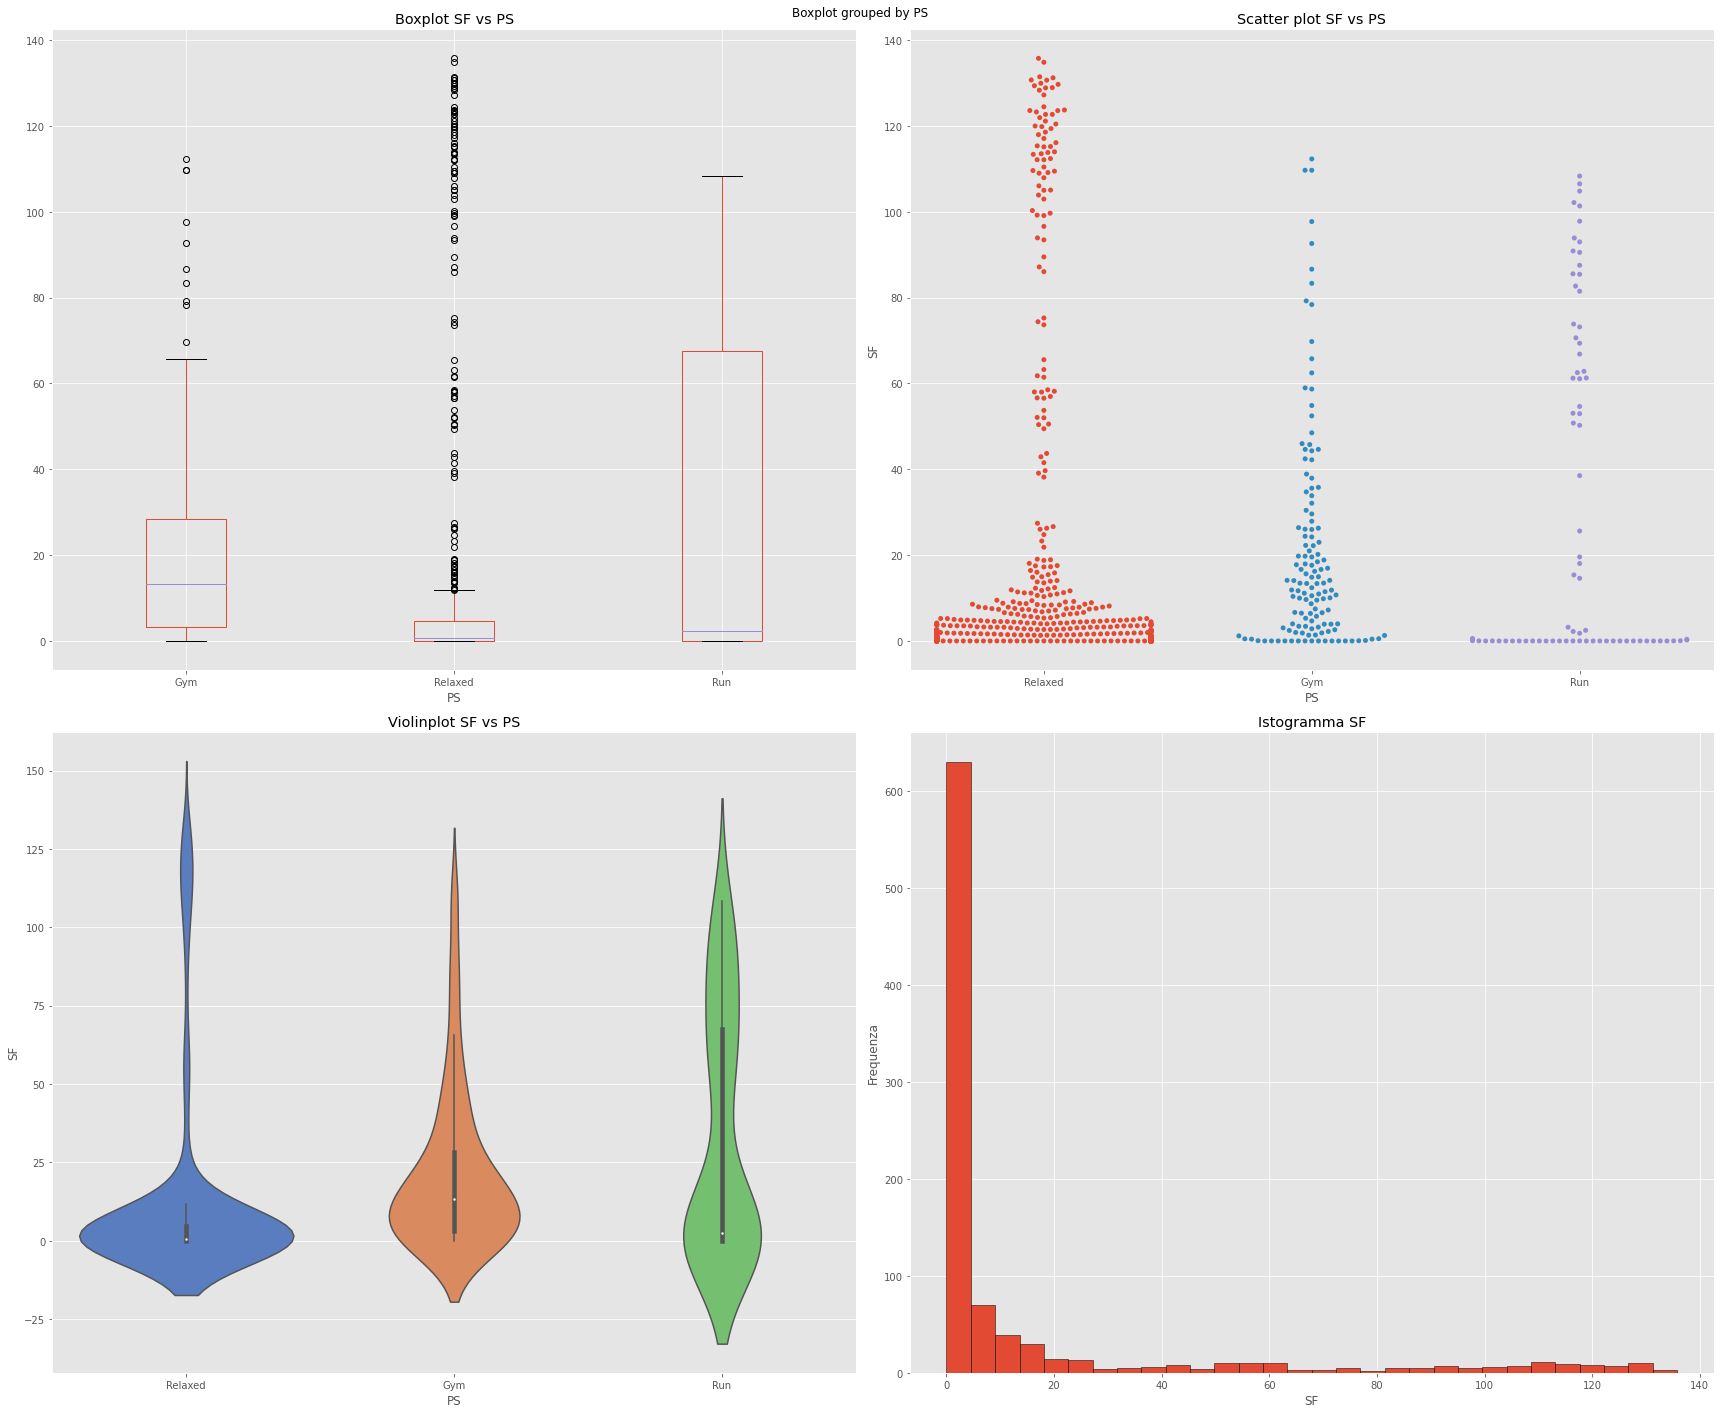

In [69]:
#analisi delle variabili individualmente
#Analisi della SF
# Crea i subplot
fig, ax = plt.subplots(2, 2, figsize=(24, 20))

# Boxplot
df.boxplot(column='SF', by='PS', ax=ax[0, 0])
ax[0, 0].set_title('Boxplot SF vs PS')

# Swarmplot
sns.swarmplot(x='PS', y='SF', data=df, ax=ax[0, 1])
ax[0, 1].set_title('Scatter plot SF vs PS')

# Violinplot
sns.violinplot(x='PS', y='SF', data=df, palette='muted', ax=ax[1, 0])
ax[1, 0].set_title('Violinplot SF vs PS')

# Istogramma
ax[1, 1].hist(df["SF"], bins=30, edgecolor='black')
ax[1, 1].set_title('Istogramma SF')
ax[1, 1].set_xlabel('SF')
ax[1, 1].set_ylabel('Frequenza')

# Aggiusta gli spazi tra i subplot
plt.tight_layout()

# Mostra la figura
plt.show()

C:\Users\Giuseppe\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 52.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Giuseppe\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


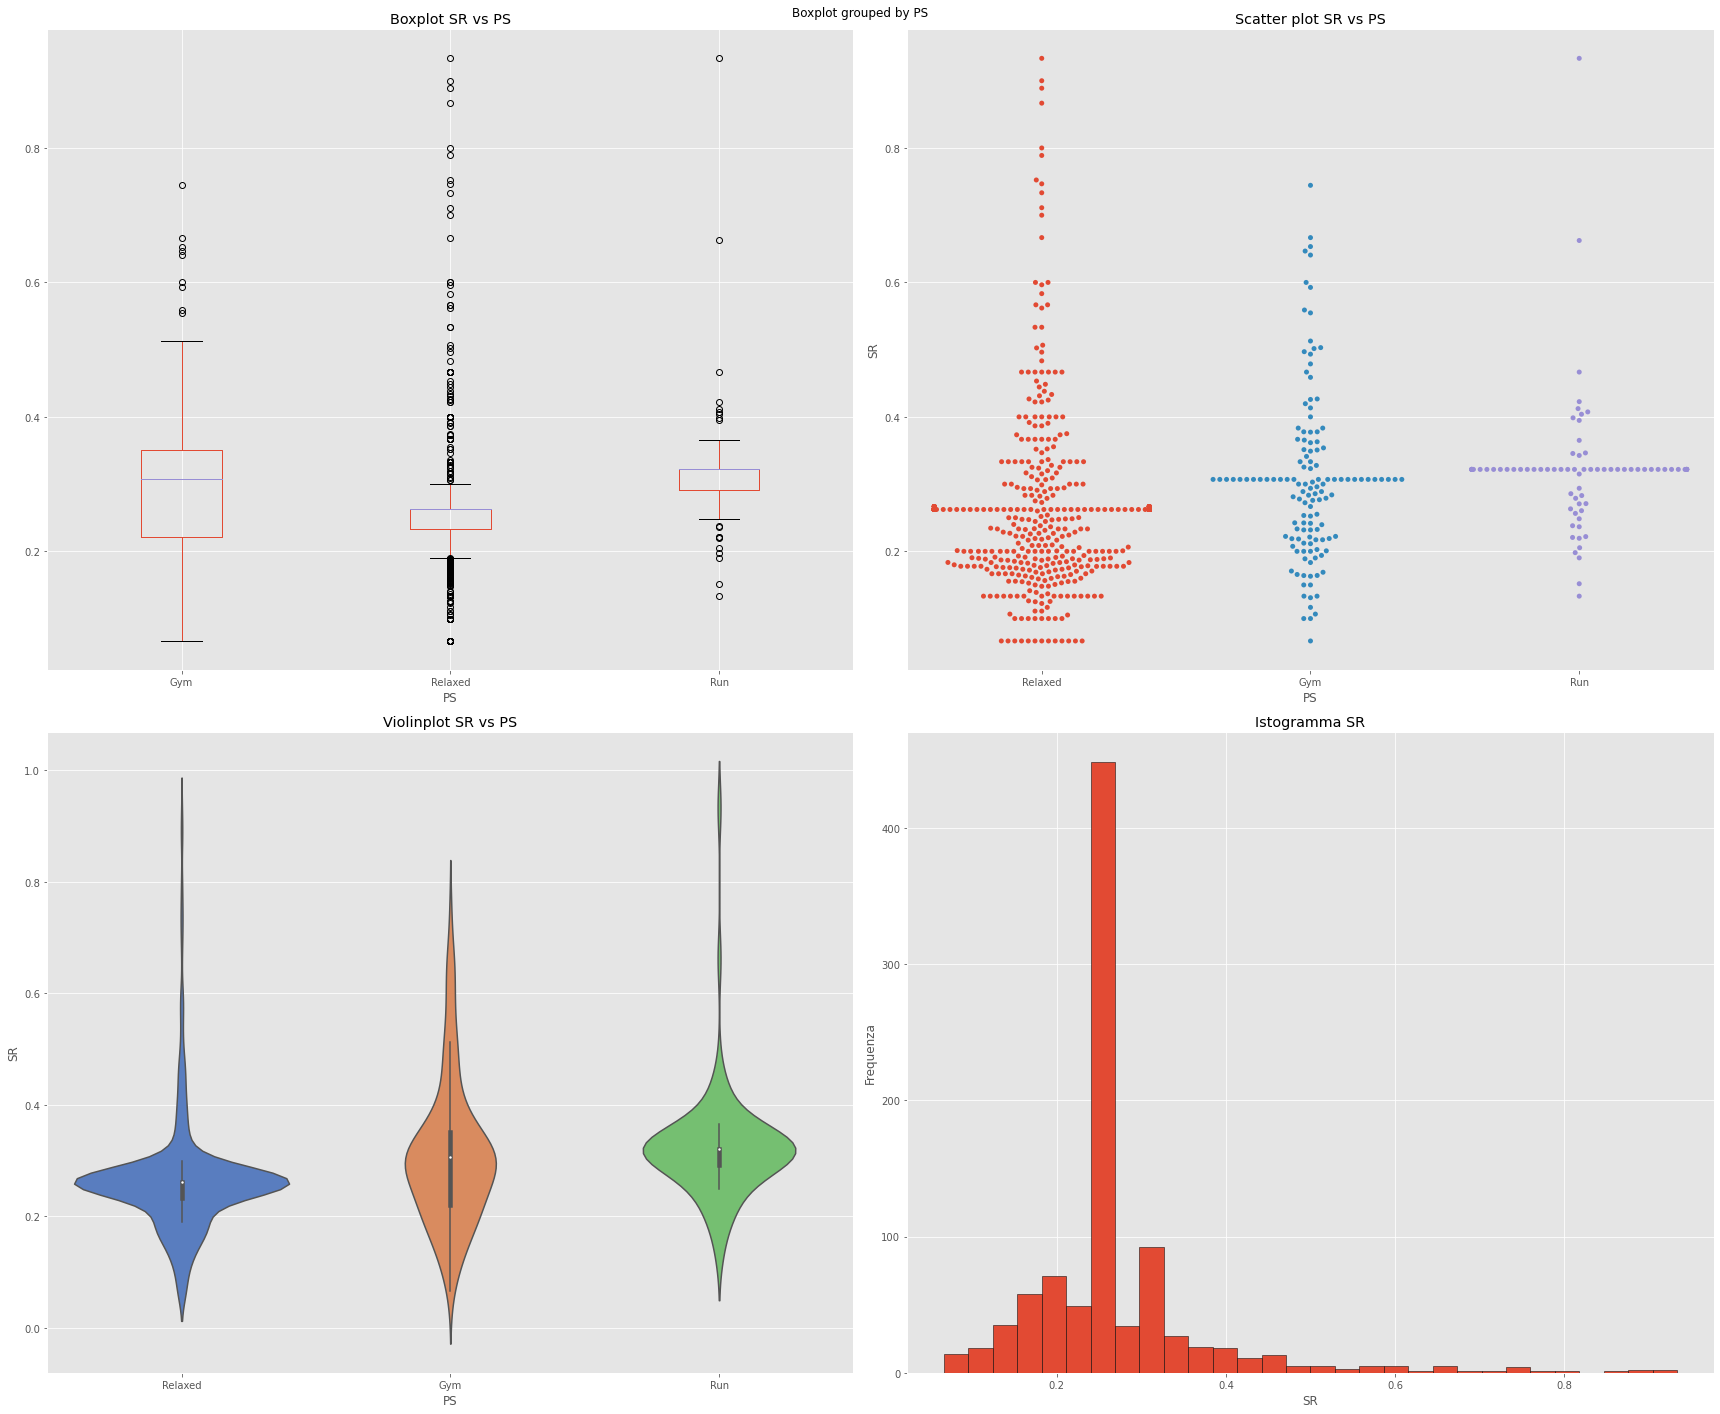

In [70]:
#analisi delle variabili individualmente
#Analisi della SR
# Crea i subplot
fig, ax = plt.subplots(2, 2, figsize=(24, 20))

# Boxplot
df.boxplot(column='SR', by='PS', ax=ax[0, 0])
ax[0, 0].set_title('Boxplot SR vs PS')

# Swarmplot
sns.swarmplot(x='PS', y='SR', data=df, ax=ax[0, 1])
ax[0, 1].set_title('Scatter plot SR vs PS')

# Violinplot
sns.violinplot(x='PS', y='SR', data=df, palette='muted', ax=ax[1, 0])
ax[1, 0].set_title('Violinplot SR vs PS')

# Istogramma
ax[1, 1].hist(df["SR"], bins=30, edgecolor='black')
ax[1, 1].set_title('Istogramma SR')
ax[1, 1].set_xlabel('SR')
ax[1, 1].set_ylabel('Frequenza')

# Aggiusta gli spazi tra i subplot
plt.tight_layout()

# Mostra la figura
plt.show()

C:\Users\Giuseppe\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 95.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Giuseppe\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 73.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Giuseppe\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


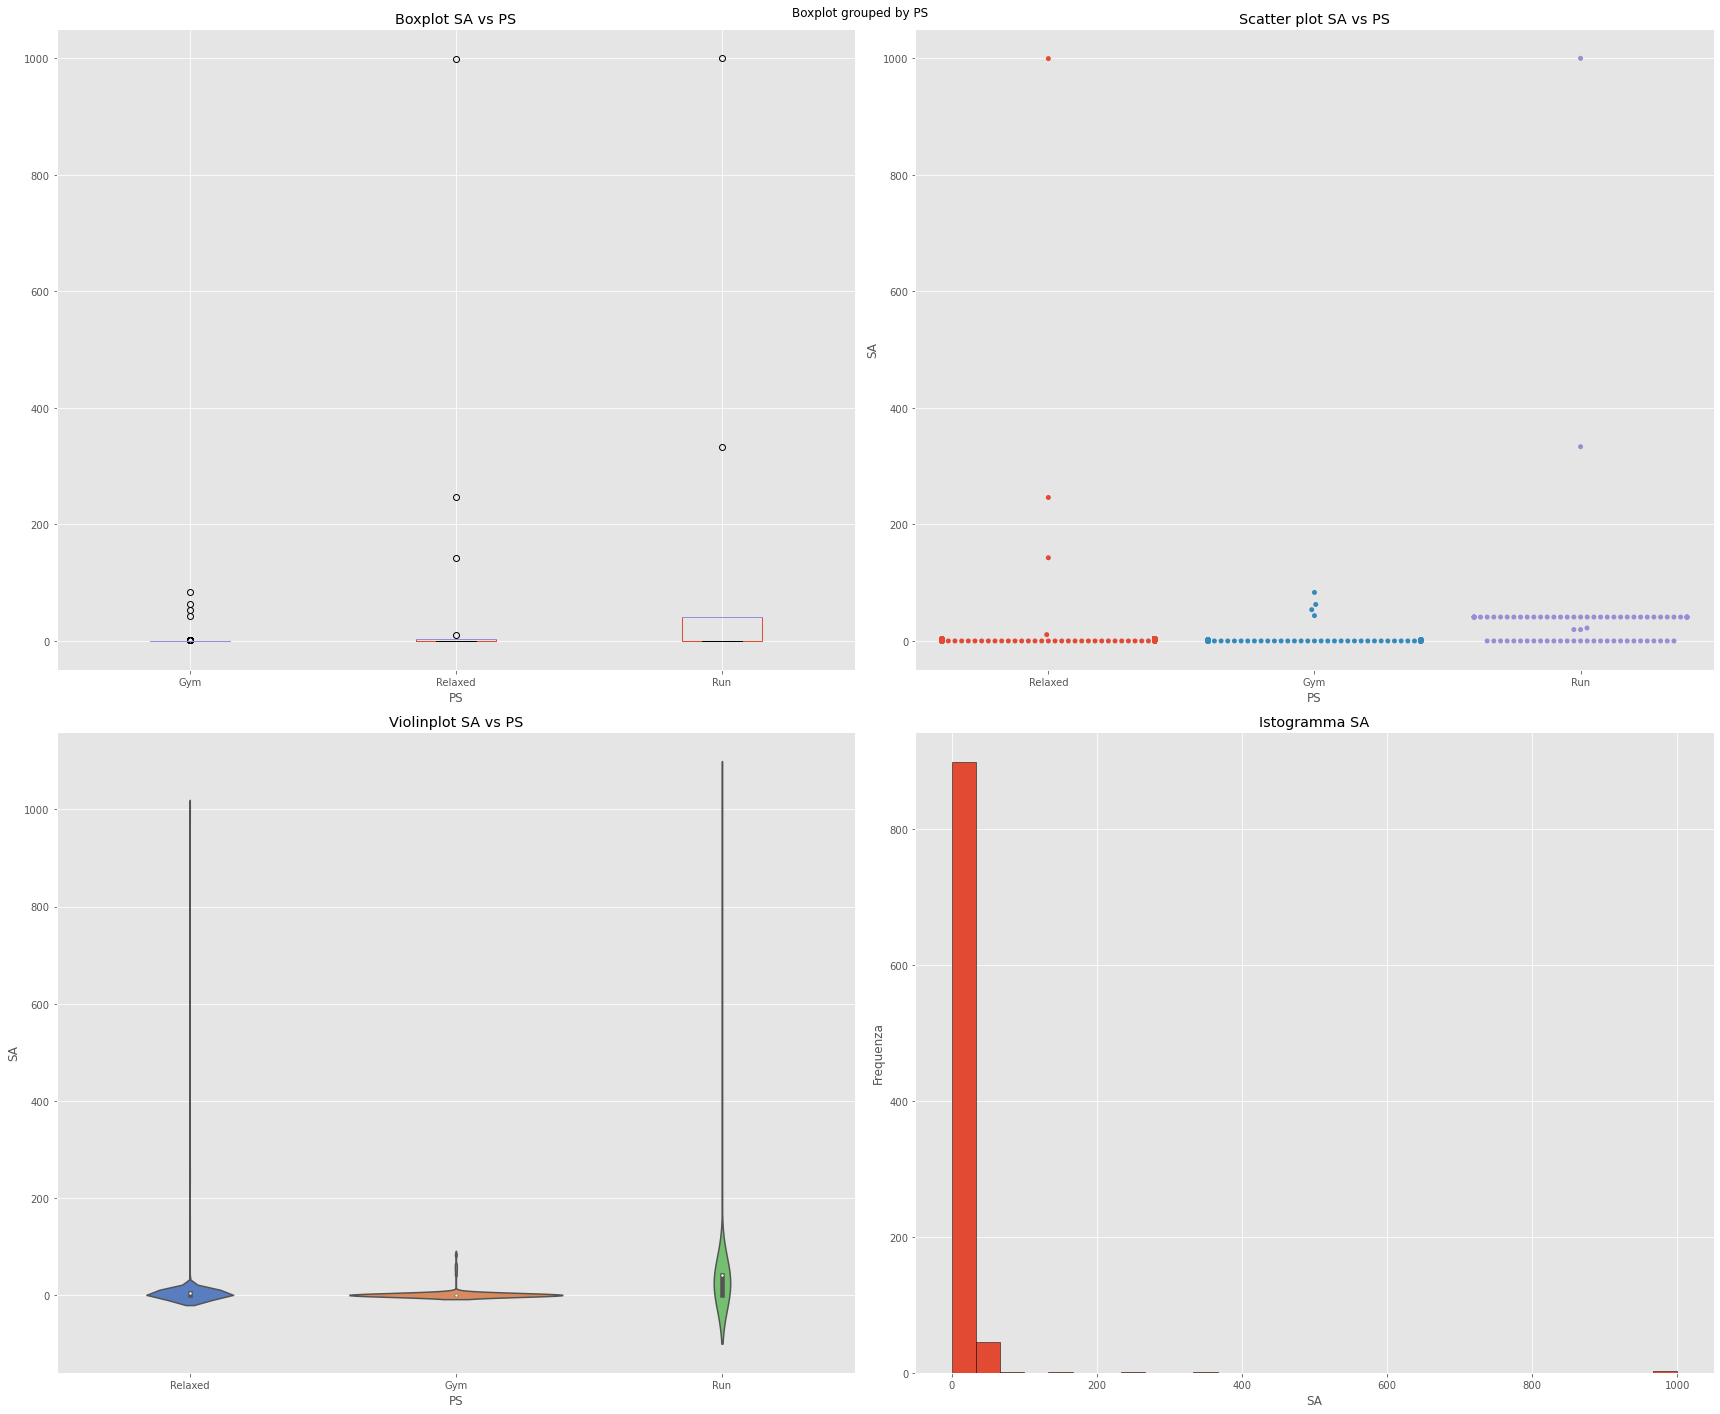

In [71]:
#analisi delle variabili individualmente
#Analisi della SR
# Crea i subplot
fig, ax = plt.subplots(2, 2, figsize=(24, 20))

# Boxplot
df.boxplot(column='SA', by='PS', ax=ax[0, 0])
ax[0, 0].set_title('Boxplot SA vs PS')

# Swarmplot
sns.swarmplot(x='PS', y='SA', data=df, ax=ax[0, 1])
ax[0, 1].set_title('Scatter plot SA vs PS')

# Violinplot
sns.violinplot(x='PS', y='SA', data=df, palette='muted', ax=ax[1, 0])
ax[1, 0].set_title('Violinplot SA vs PS')

# Istogramma
ax[1, 1].hist(df["SA"], bins=30, edgecolor='black')
ax[1, 1].set_title('Istogramma SA')
ax[1, 1].set_xlabel('SA')
ax[1, 1].set_ylabel('Frequenza')

# Aggiusta gli spazi tra i subplot
plt.tight_layout()

# Mostra la figura
plt.show()

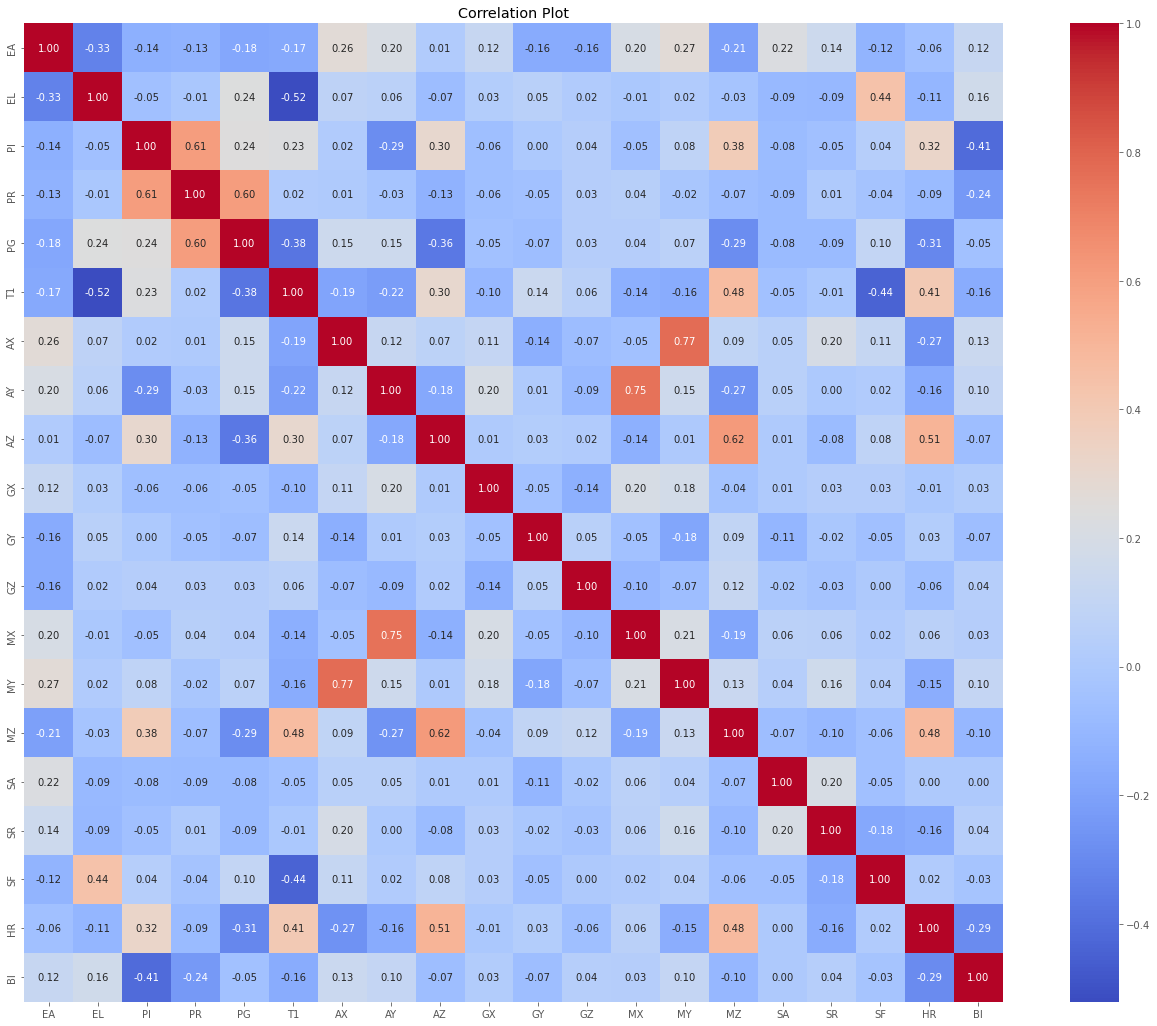

In [72]:
corr = df.corr()

# Creare il correlation plot
plt.figure(figsize=(24, 18))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Plot')
plt.show()

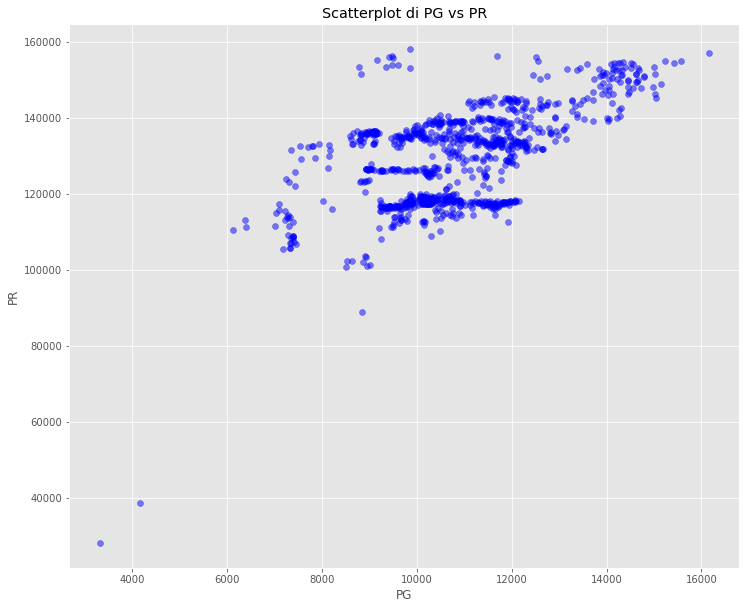

In [77]:
#scatter tra PG e PR per verificare graficamente la correlazione
fig, ax = plt.subplots(figsize=(12, 10))
plt.scatter(df['PG'], df['PR'], color='blue', alpha=0.5)

# Aggiungi titoli e etichette
plt.title('Scatterplot di PG vs PR')
plt.xlabel('PG')
plt.ylabel('PR')

# Mostra lo scatterplot
plt.show()

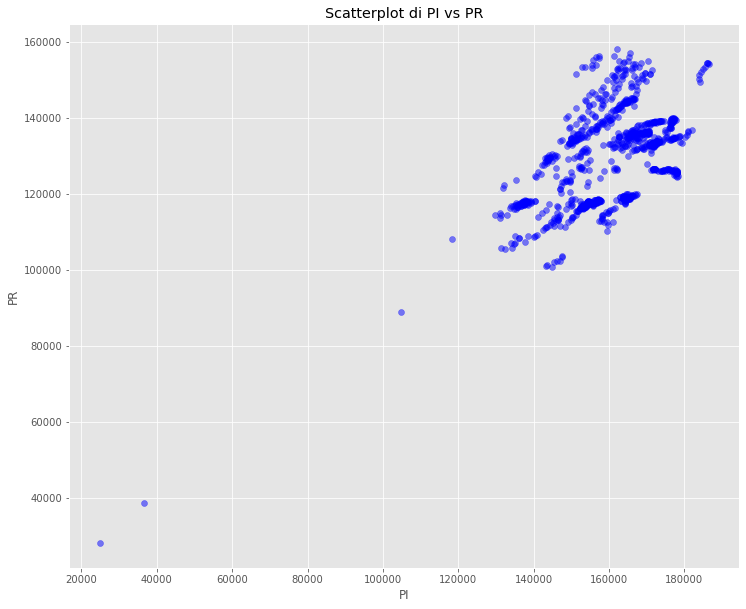

In [102]:
#scatter tra PG e PR per verificare graficamente la correlazione
fig, ax = plt.subplots(figsize=(12, 10))
plt.scatter(df['PI'], df['PR'], color='blue', alpha=0.5)

# Aggiungi titoli e etichette
plt.title('Scatterplot di PI vs PR')
plt.xlabel('PI')
plt.ylabel('PR')

# Mostra lo scatterplot
plt.show()

In [103]:
#classifichiamo gli stati fisici attraverso il KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

In [104]:
#creiamo il modello di knn con nearest pari a 10
knn = KNeighborsClassifier(n_neighbors=4)

In [105]:
#prendo solo le variabili di interesse
df_col = df.loc[:, ['EL', 'PI','PR','PG','T1', 'AX','AY','AZ','SA','SR','SF','HR','BI']]

In [106]:
#riscaliamo le variabili tra 0 e 1
scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
scaled = scaler.fit_transform(df_col)
df_scaled = pd.DataFrame(scaled)

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
#dividiamo il dataset in train e test set(x solo i predittori e y la var dipendente)
x_train, x_test, y_train, y_test = train_test_split(df_scaled, df["PS"], test_size = 0.3, random_state = 123)

In [96]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [97]:
pred = knn.predict(x_test)

In [98]:
#matrice di confusione
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix(y_test,pred)

array([[ 39,   0,   1],
       [  2, 223,   0],
       [  3,   0,  17]], dtype=int64)

In [99]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         Gym       0.89      0.97      0.93        40
     Relaxed       1.00      0.99      1.00       225
         Run       0.94      0.85      0.89        20

    accuracy                           0.98       285
   macro avg       0.94      0.94      0.94       285
weighted avg       0.98      0.98      0.98       285



In [100]:
#elbow method per scegliere il miglior iperparametro

err = []

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    err.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'media errori')

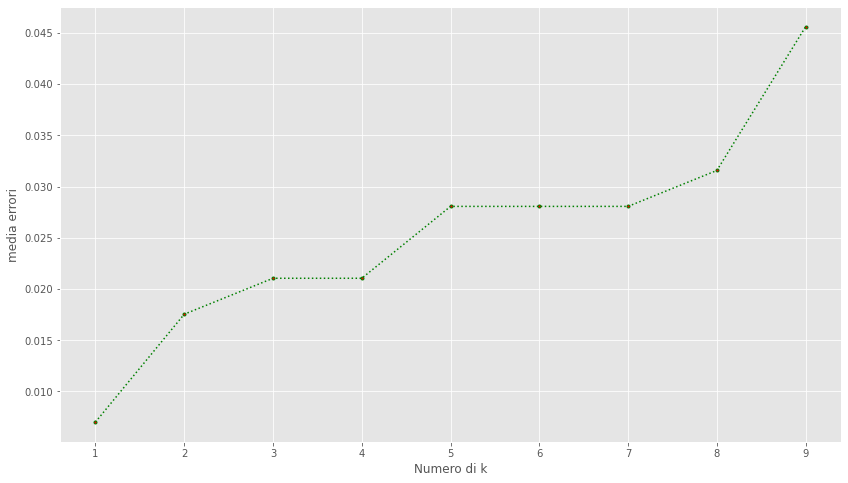

In [101]:
#rappresentiamo graficamente quale k sia stato il migliore per il nostro dataset
plt.figure(figsize = (14,8))
plt.plot(range(1,10), err, color = 'green', linestyle = 'dotted', marker= 'o', markerfacecolor = 'red', markersize = '3')
plt.xlabel("Numero di k")
plt.ylabel("media errori")